In [4]:
import pandas as pd
import numpy as np
import glob
import os
import sys
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor
# import ipynb.fs.full.functions as func # importing functions from functions module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 100
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [5]:
# for working from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install import-ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 8.5 MB/s 


In [7]:
import import_ipynb
import sys
sys.path.append('/content/drive/MyDrive/Master/Tez')
%cd "/content/drive/MyDrive/Master/Tez"

/content/drive/MyDrive/Master/Tez


In [ ]:
# for jupyter notebook
# path = r'C:\Users\Lenovo\Desktop\ML Neuro\data\Data for ML_v2.xlsx'

In [8]:
# df_age_sex = pd.read_csv(r'C:\Users\lenovo\Desktop\ML Neuro\data\FNIRS_bilgi.csv')
df_age_sex = pd.read_csv(r'FNIRS_bilgi.csv')

In [9]:
# df = pd.read_excel(path, engine='openpyxl')
df = pd.read_excel('Data for ML_v2.xlsx', engine='openpyxl')

# Simple Statistics and Data Cleaning

## Demographics merge and Columns rearranging

In [10]:
df_age_sex.columns = ['Part_No','Sex','Age','Education']
df_age_sex.head(5)

,Part_No,Sex,Age,Education
0,1,E,39,master
1,2,E,27,lisans
2,3,E,28,lisans
3,4,K,23,önlisans
4,5,K,23,lisans


In [11]:
df = df.merge(df_age_sex, how='inner', on='Part_No')

In [12]:
cols = df.columns.to_list()

In [13]:
cols = [cols[0]] + cols[-3:] + cols[1:-3]

In [14]:
df = df[cols]

In [15]:
print(cols)

['Part_No', 'Sex', 'Age', 'Education', 'Stim_ID', 'Y/K', 'Direction', 'RespTime', 'Response', 'Like_OR_Nolike', 'G1', 'G2', 'Goxy1', 'Goxy2', 'Goxy3', 'Goxy4', 'Goxy5', 'Goxy6', 'Goxy7', 'Goxy8', 'Goxy9', 'Goxy10', 'Goxy11', 'Goxy12', 'Goxy13', 'Goxy14', 'Goxy15', 'Goxy16', 'Ghbr1', 'Ghbr2', 'Ghbr3', 'Ghbr4', 'Ghbr5', 'Ghbr6', 'Ghbr7', 'Ghbr8', 'Ghbr9', 'Ghbr10', 'Ghbr11', 'Ghbr12', 'Ghbr13', 'Ghbr14', 'Ghbr15', 'Ghbr16', 'Ghbo1', 'Ghbo2', 'Ghbo3', 'Ghbo4', 'Ghbo5', 'Ghbo6', 'Ghbo7', 'Ghbo8', 'Ghbo9', 'Ghbo10', 'Ghbo11', 'Ghbo12', 'Ghbo13', 'Ghbo14', 'Ghbo15', 'Ghbo16', 'Ghbt1', 'Ghbt2', 'Ghbt3', 'Ghbt4', 'Ghbt5', 'Ghbt6', 'Ghbt7', 'Ghbt8', 'Ghbt9', 'Ghbt10', 'Ghbt11', 'Ghbt12', 'Ghbt13', 'Ghbt14', 'Ghbt15', 'Ghbt16', 'Koxy1', 'Koxy2', 'Koxy3', 'Koxy4', 'Koxy5', 'Koxy6', 'Koxy7', 'Koxy8', 'Koxy9', 'Koxy10', 'Koxy11', 'Koxy12', 'Koxy13', 'Koxy14', 'Koxy15', 'Koxy16', 'Khbr1', 'Khbr2', 'Khbr3', 'Khbr4', 'Khbr5', 'Khbr6', 'Khbr7', 'Khbr8', 'Khbr9', 'Khbr10', 'Khbr11', 'Khbr12', 'Khbr13', 

In [16]:
df.replace({'Sex': {'E':'Male','K':'Female'}},inplace=True)

## Counting NA values

## count Nan values in Response feature then removing them.

In [17]:
count_Nan = df.Response.isna().sum()
count_Nan
df = df[df['Response'].notna()]

114

In [18]:
df.Part_No.nunique()

27

In [19]:
df.Part_No.unique()

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [20]:
df.shape

(1566, 140)

## Removing values other than left and right in "Response" feature

In [21]:
response = ['Left', 'Right']
df = df[df.Response.isin(response)]
df.reset_index(inplace = True, drop = True) # resetting indexing
df.shape

(1565, 140)

## correcting education values 

In [22]:
df.replace({'Education':{'master':'Masters', 'lisans':'Undergraduate', 'önlisans':'High School', 'c.PhD':'PhD', 'YL':'Masters', 'linans öğr':'High School', 'yl':'Masters', 'lise':'High School',
 'Lisans':'Undergraduate', 'Lisans öğr':'High School', 'lisans ':'Undergraduate', 'YL öğr':'Undergraduate'}},inplace=True)

In [33]:
df.replace({'Like_OR_Nolike':{True:'Like',False:'NoLike'}},inplace=True)

In [23]:
stats = df.drop(columns=['Part_No','Stim_ID','Y/K', 'Direction', 'Education','Response', 'Like_OR_Nolike', 'G1', 'G2']).describe().T

In [71]:
numerical = df.drop(columns=['Part_No','Sex','Stim_ID','Y/K', 'Direction', 'Education','Response', 'G1', 'G2'])

In [25]:
categorical = df[['Sex','Education','Response', 'Like_OR_Nolike', 'G1', 'G2']]

In [26]:
stats.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [27]:
stats.columns = ['Count', 'Mean', 'Standard Deviation', 'Minimum', '25%', '50%', '75%', 'Maximum']

In [28]:
stats.to_excel('stats.xlsx')

In [29]:
categorical.isna().sum()

Sex               0
Education         0
Response          0
Like_OR_Nolike    0
G1                0
G2                0
dtype: int64

In [30]:
for i in categorical.columns[:-2]:
  print(categorical[i].unique())
  print(categorical[i].value_counts(dropna=False))

['Male' 'Female']
Female    1036
Male       529
Name: Sex, dtype: int64
['Masters' 'Undergraduate' 'High School' 'PhD']
Undergraduate    710
High School      517
Masters          219
PhD              119
Name: Education, dtype: int64
['Left' 'Right']
Left     818
Right    747
Name: Response, dtype: int64
[ True False]
True     820
False    745
Name: Like_OR_Nolike, dtype: int64


In [31]:
df.Part_No.unique()

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [32]:
df['Like_OR_Nolike'].value_counts()

True     820
False    745
Name: Like_OR_Nolike, dtype: int64

# Categorical Plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(-0.15000000000000002, 820.01, '820.0')

Text(0.85, 745.01, '745.0')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(-0.4, 272.01, '272.0')

Text(0.6000000000000001, 548.01, '548.0')

Text(-2.7755575615628914e-17, 257.01, '257.0')

Text(0.9999999999999999, 488.01, '488.0')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(-0.4, 94.01, '94.0')

Text(0.6000000000000001, 406.01, '406.0')

Text(1.6, 271.01, '271.0')

Text(2.5999999999999996, 49.01, '49.0')

Text(-2.7755575615628914e-17, 125.01, '125.0')

Text(0.9999999999999999, 304.01, '304.0')

Text(2.0, 246.01, '246.0')

Text(3.0, 70.01, '70.0')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(-0.45, 416.01, '416.0')

Text(0.55, 404.01, '404.0')

Text(-0.05000000000000003, 402.01, '402.0')

Text(0.9499999999999998, 343.01, '343.0')

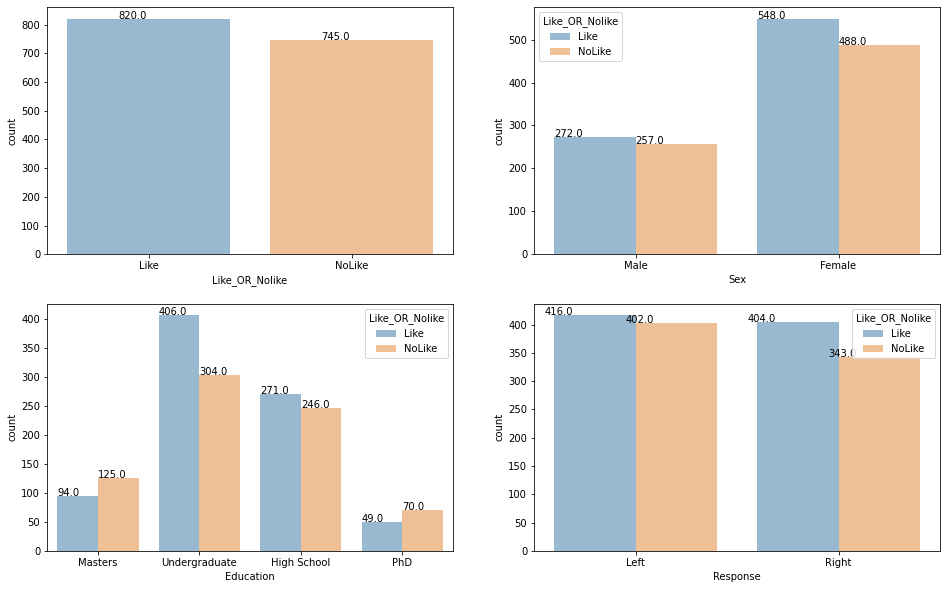

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes[0,0] = sns.countplot('Like_OR_Nolike', data=df, ax=axes[0, 0], alpha = 0.5)
for p in axes[0,0].patches:
   axes[0,0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
axes[0,1] = sns.countplot('Sex', hue='Like_OR_Nolike', data=df, ax=axes[0, 1], alpha = 0.5)
for p in axes[0,1].patches:
   axes[0,1].annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))
axes[1,0] = sns.countplot('Education', hue='Like_OR_Nolike', data=df, ax=axes[1, 0], alpha = 0.5)
for p in axes[1,0].patches:
   axes[1,0].annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))
axes[1,1] = sns.countplot('Response', hue='Like_OR_Nolike', data=df, ax=axes[1, 1], alpha = 0.5)
for p in axes[1,1].patches:
   axes[1,1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()-0.05, p.get_height()+0.01))
plt.show()

# Distribution Plots of Numerical Features

In [36]:
numerical_like = numerical[numerical['Like_OR_Nolike'] == 'Like'].drop(columns=['Like_OR_Nolike'])

In [37]:
numerical_Nolike = numerical[numerical['Like_OR_Nolike'] == 'NoLike'].drop(columns=['Like_OR_Nolike'])

In [74]:
numerical_cols = numerical.columns.to_list()
numerical_cols = [numerical_cols[2]] + numerical_cols[0:2] + numerical_cols[3:]
numerical = numerical[numerical_cols]

In [75]:
numerical

,Like_OR_Nolike,Age,RespTime,Goxy1,Goxy2,Goxy3,Goxy4,Goxy5,Goxy6,Goxy7,Goxy8,Goxy9,Goxy10,Goxy11,Goxy12,Goxy13,Goxy14,Goxy15,Goxy16,Ghbr1,Ghbr2,Ghbr3,Ghbr4,Ghbr5,Ghbr6,Ghbr7,Ghbr8,Ghbr9,Ghbr10,Ghbr11,Ghbr12,Ghbr13,Ghbr14,Ghbr15,Ghbr16,Ghbo1,Ghbo2,Ghbo3,Ghbo4,Ghbo5,Ghbo6,Ghbo7,Ghbo8,Ghbo9,Ghbo10,Ghbo11,Ghbo12,Ghbo13,Ghbo14,Ghbo15,Ghbo16,Ghbt1,Ghbt2,Ghbt3,Ghbt4,Ghbt5,Ghbt6,Ghbt7,Ghbt8,Ghbt9,Ghbt10,Ghbt11,Ghbt12,Ghbt13,Ghbt14,Ghbt15,Ghbt16,Koxy1,Koxy2,Koxy3,Koxy4,Koxy5,Koxy6,Koxy7,Koxy8,Koxy9,Koxy10,Koxy11,Koxy12,Koxy13,Koxy14,Koxy15,Koxy16,Khbr1,Khbr2,Khbr3,Khbr4,Khbr5,Khbr6,Khbr7,Khbr8,Khbr9,Khbr10,Khbr11,Khbr12,Khbr13,Khbr14,Khbr15,Khbr16,Khbo1,Khbo2,Khbo3,Khbo4,Khbo5,Khbo6,Khbo7,Khbo8,Khbo9,Khbo10,Khbo11,Khbo12,Khbo13,Khbo14,Khbo15,Khbo16,Khbt1,Khbt2,Khbt3,Khbt4,Khbt5,Khbt6,Khbt7,Khbt8,Khbt9,Khbt10,Khbt11,Khbt12,Khbt13,Khbt14,Khbt15,Khbt16
0,Like,39,2292.0,0.530860,0.571811,0.876945,0.895395,0.618246,0.775132,1.141467,0.017443,0.231609,-0.084973,0.011109,-0.082605,-1.784506,-0.598040,-0.671195,NaN,-0.439243,-0.498822,-0.564051,-0.807433,-0.413861,-0.650190,-0.978439,-0.074692,-0.243569,0.039038,0.121672,0.054662,1.092793,0.388220,0.384527,NaN,0.091617,0.072988,0.312894,0.087962,0.204385,0.124942,0.163028,-0.057249,-0.011960,-0.045935,0.132781,-0.027944,-0.691713,-0.209819,-0.286668,NaN,-0.347626,-0.425834,-0.251157,-0.719471,-0.209475,-0.525248,-0.815411,-0.131941,-0.255529,-0.006897,0.254454,0.026718,0.401080,0.178401,0.097859,NaN,0.811057,1.100687,1.334711,1.311974,0.809818,0.952328,1.423814,0.018645,0.260361,-0.240256,-0.078202,-0.035370,-2.348474,-0.714057,-0.741101,NaN,-0.646730,-0.564837,-0.882807,-0.951400,-0.544274,-0.603159,-1.220996,0.072544,-0.353696,0.268320,0.150834,0.116103,1.461363,0.591867,0.453544,NaN,0.164326,0.535850,0.451904,0.360574,0.265544,0.349169,0.202817,0.091189,-0.093334,0.028064,0.072632,0.080733,-0.887111,-0.122190,-0.287557,NaN,-0.482404,-0.028987,-0.430903,-0.590826,-0.278730,-0.253990,-1.018179,0.163734,-0.447030,0.296384,0.223466,0.196836,0.574252,0.469677,0.165987,NaN
1,NoLike,39,1459.0,-0.016150,0.089965,-0.148061,0.206889,0.070859,0.378170,0.412107,0.325312,0.439381,0.417096,0.303118,0.397769,0.629696,0.427812,0.483460,0.208160,-0.048277,-0.208151,0.119465,-0.232437,-0.011533,-0.272199,-0.206342,-0.476173,-0.276975,-0.575903,-0.143816,-0.315825,-0.523744,-0.599519,-0.428484,-0.316551,-0.064427,-0.118186,-0.028596,-0.025547,0.059326,0.105971,0.205765,-0.150861,0.162406,-0.158807,0.159301,0.081944,0.105952,-0.171707,0.054975,-0.108391,-0.112703,-0.326338,0.090868,-0.257984,0.047793,-0.166229,-0.000578,-0.627035,-0.114569,-0.734710,0.015485,-0.233881,-0.417792,-0.771225,-0.373509,-0.424942,0.174428,0.653096,-0.038715,0.650251,0.175557,0.766687,0.819796,0.545715,0.706113,0.635638,0.500461,0.649931,0.412645,0.467408,0.471701,1.463744,-0.249283,-0.731326,0.160259,-0.528862,-0.040307,-0.479963,-0.354216,-0.706690,-0.334903,-0.812840,-0.184560,-0.441936,-0.368731,-0.705205,-0.498745,-2.332100,-0.074855,-0.078230,0.121545,0.121389,0.135250,0.286725,0.465580,-0.160975,0.371210,-0.177202,0.315901,0.207995,0.043914,-0.237797,-0.027044,-0.868356,-0.324137,-0.809556,0.281804,-0.407472,0.094943,-0.193238,0.111364,-0.867665,0.036307,-0.990043,0.131340,-0.233941,-0.324817,-0.943003,-0.525789,-3.200456
2,Like,39,970.0,-0.136447,-0.272634,-0.322293,-0.284869,-0.168651,-0.220061,-0.561465,-0.030628,-0.085240,0.279583,0.185449,0.248090,0.449046,0.604036,0.395534,0.301781,0.115040,0.660709,0.119293,0.232511,0.163833,0.103896,0.329422,0.097941,0.002345,-0.065501,-0.122785,-0.246533,-0.138044,-0.383889,-0.125328,-0.081074,-0.021407,0.388075,-0.203000,-0.052358,-0.004818,-0.116165,-0.232043,0.067314,-0.082895,0.214081,0.062664,0.001557,0.311002,0.220147,0.270206,0.220707,0.093633,1.048784,-0.083707,0.180153,0.159015,-0.012269,0.097379,0.165255,-0.080550,0.148580,-0.060121,-0.244976,0.172957,-0.163742,0.144877,0.139633,0.282411,0.064885,0.454139,0.259362,0.431352,0.287118,0.094820,0.439876,-0.284129,0.363272,-0.219

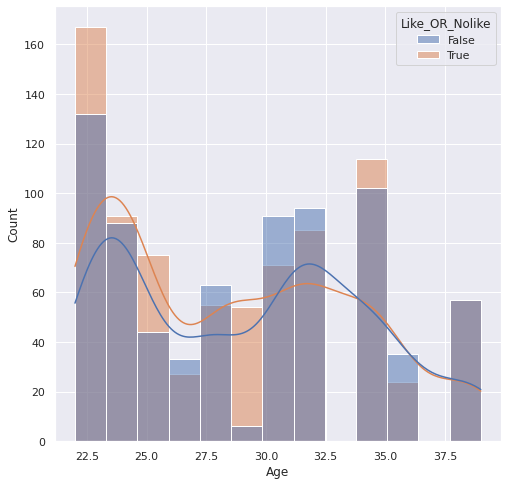

In [64]:
plt.rcParams["figure.figsize"] = (8,8)
sns.set_theme()
ax = sns.histplot(x=numerical.iloc[:,1], hue="Like_OR_Nolike", data=numerical, legend=True, kde=True)

In [ ]:
numerical

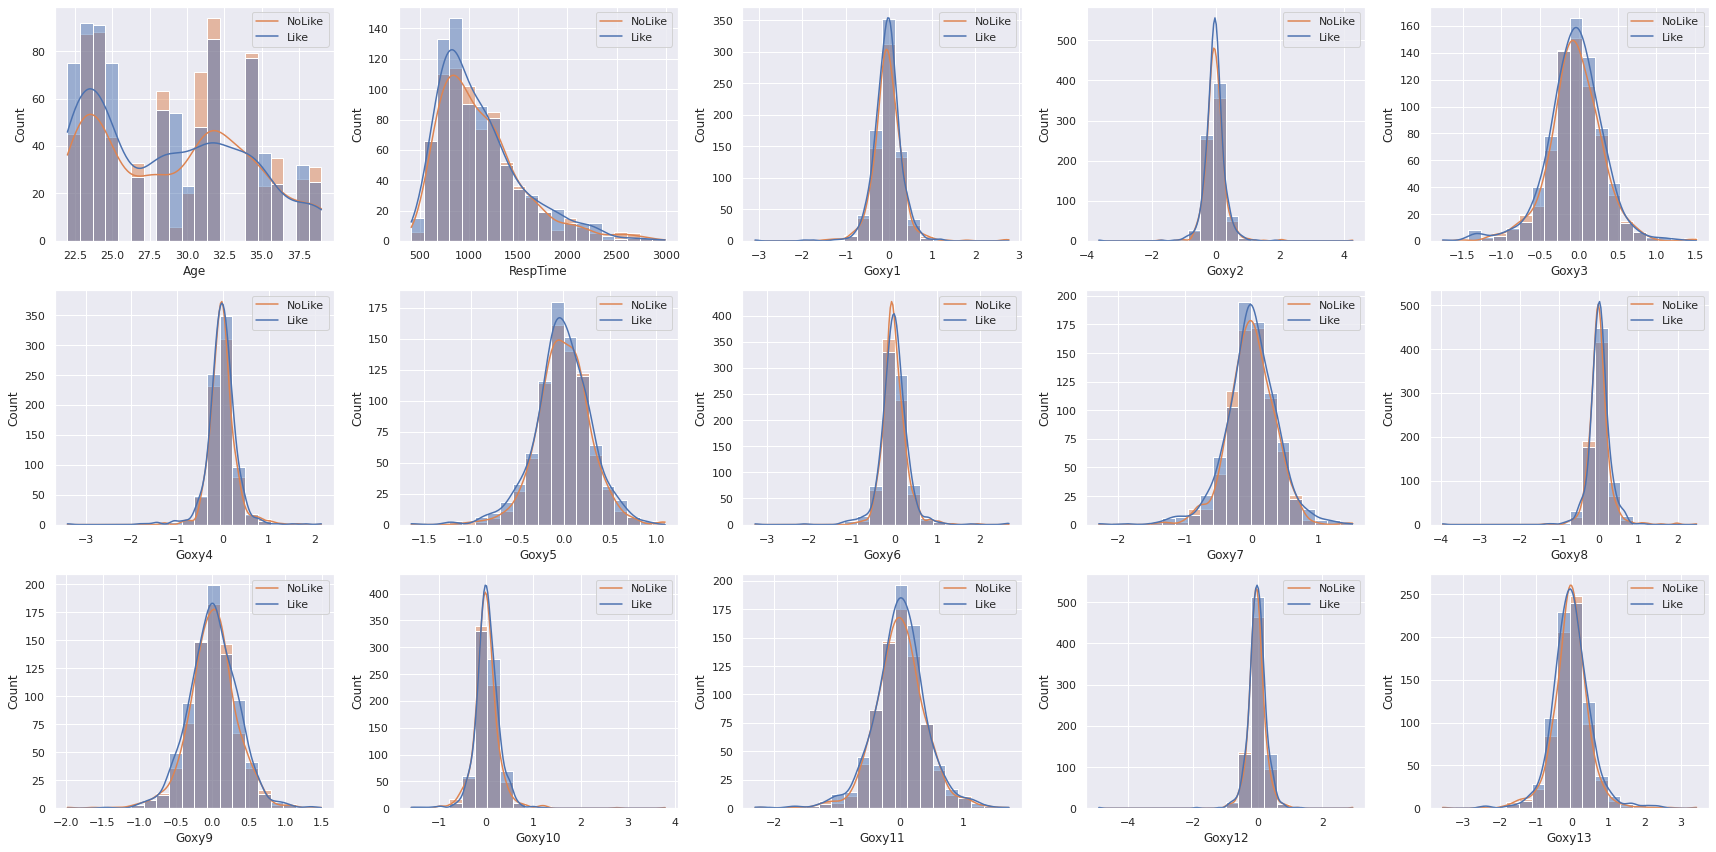

In [83]:
plt.rcParams["figure.figsize"] = (24,12)
sns.set(color_codes=True)
for i in range (2,17):
  ax = plt.subplot(3,5, i-1)
  # plt.ylim(-.3, 0.3) 
  # ax.legend(fontsize='40', title_fontsize='45')
  plot = sns.histplot(x=numerical.iloc[:,i-1],bins=20, hue="Like_OR_Nolike",legend=False, data=numerical, kde=True, ax=ax)
  # title = plt.title(numerical.columns[i-1])
  plt.legend(labels=['NoLike', 'Like'])
  

plt.tight_layout()
plt.show()

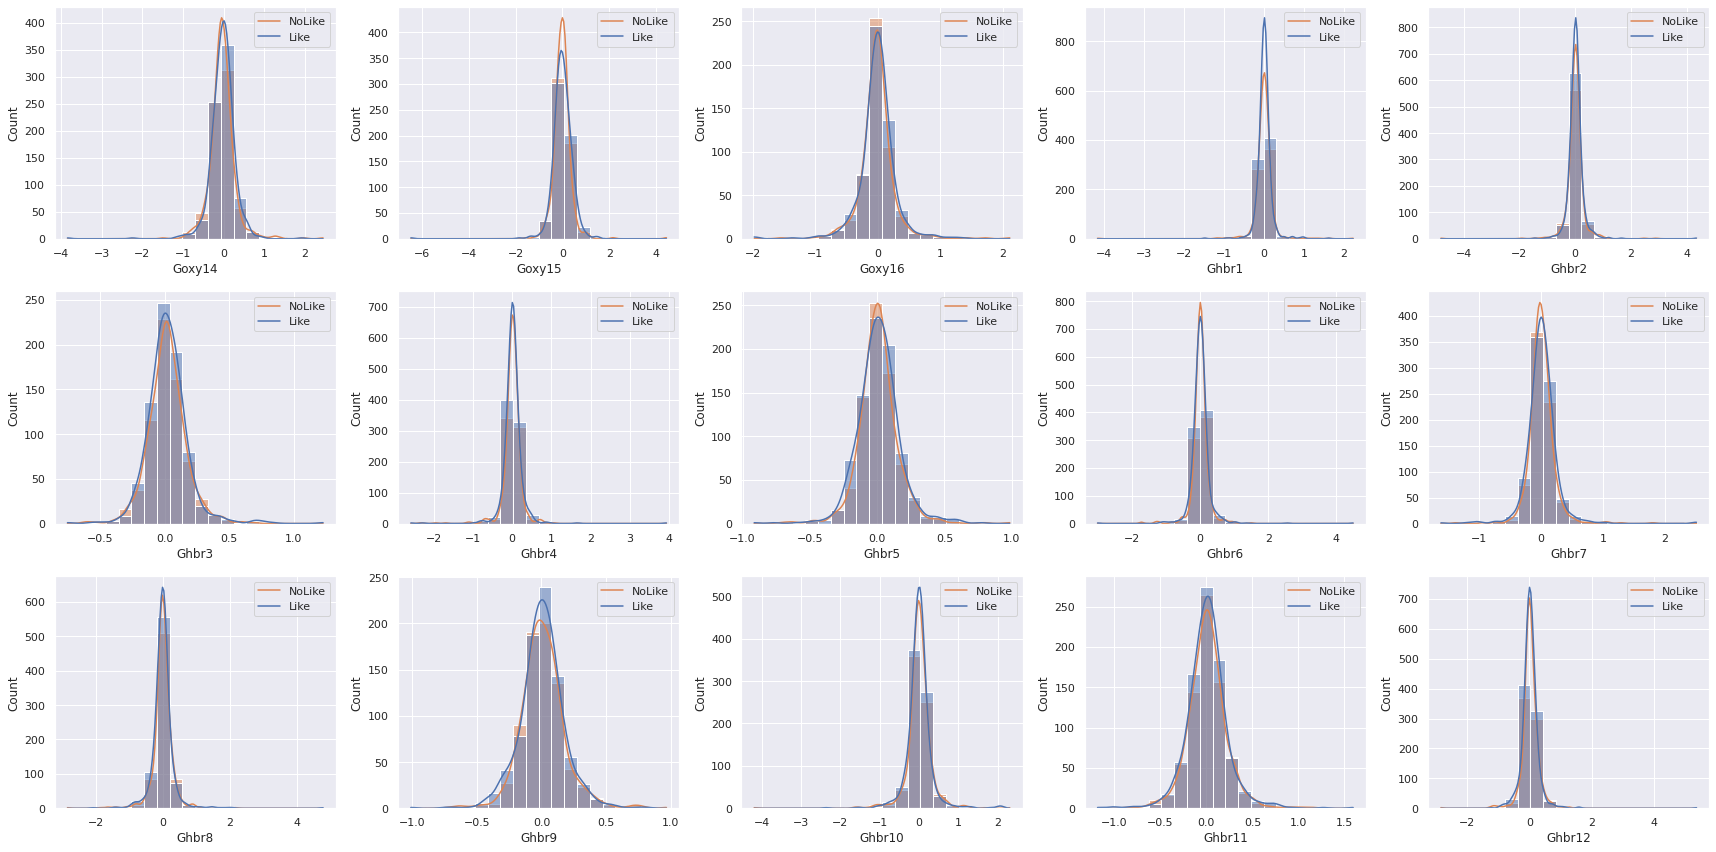

In [85]:
plt.rcParams["figure.figsize"] = (24,12)
sns.set(color_codes=True)
for i in range (17,32):
  ax = plt.subplot(3,5, i-16)
  # plt.ylim(-.3, 0.3) 
  # ax.legend(fontsize='40', title_fontsize='45')
  plot = sns.histplot(x=numerical.iloc[:,i-1],bins=20, hue="Like_OR_Nolike",legend=False, data=numerical, kde=True, ax=ax)
  # title = plt.title(numerical.columns[i-1])
  plt.legend(labels=['NoLike', 'Like'])
  

plt.tight_layout()
plt.show()

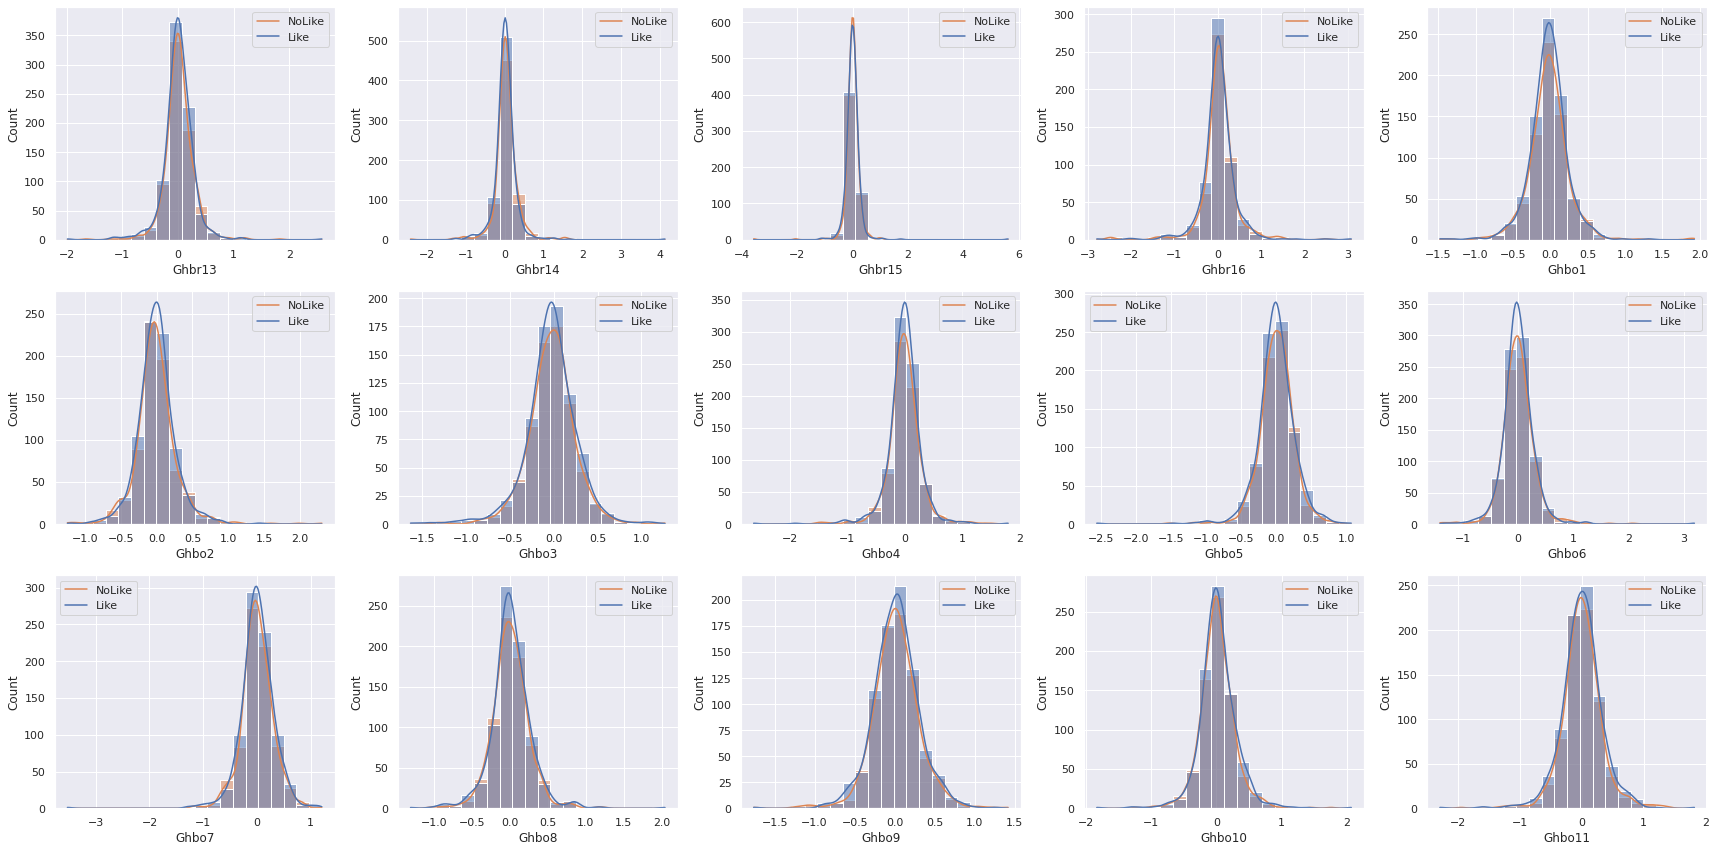

In [86]:
plt.rcParams["figure.figsize"] = (24,12)
sns.set(color_codes=True)
for i in range (32,47):
  ax = plt.subplot(3,5, i-31)
  plot = sns.histplot(x=numerical.iloc[:,i-1],bins=20, hue="Like_OR_Nolike",legend=False, data=numerical, kde=True, ax=ax)
  plt.legend(labels=['NoLike', 'Like'])
  
plt.tight_layout()
plt.show()

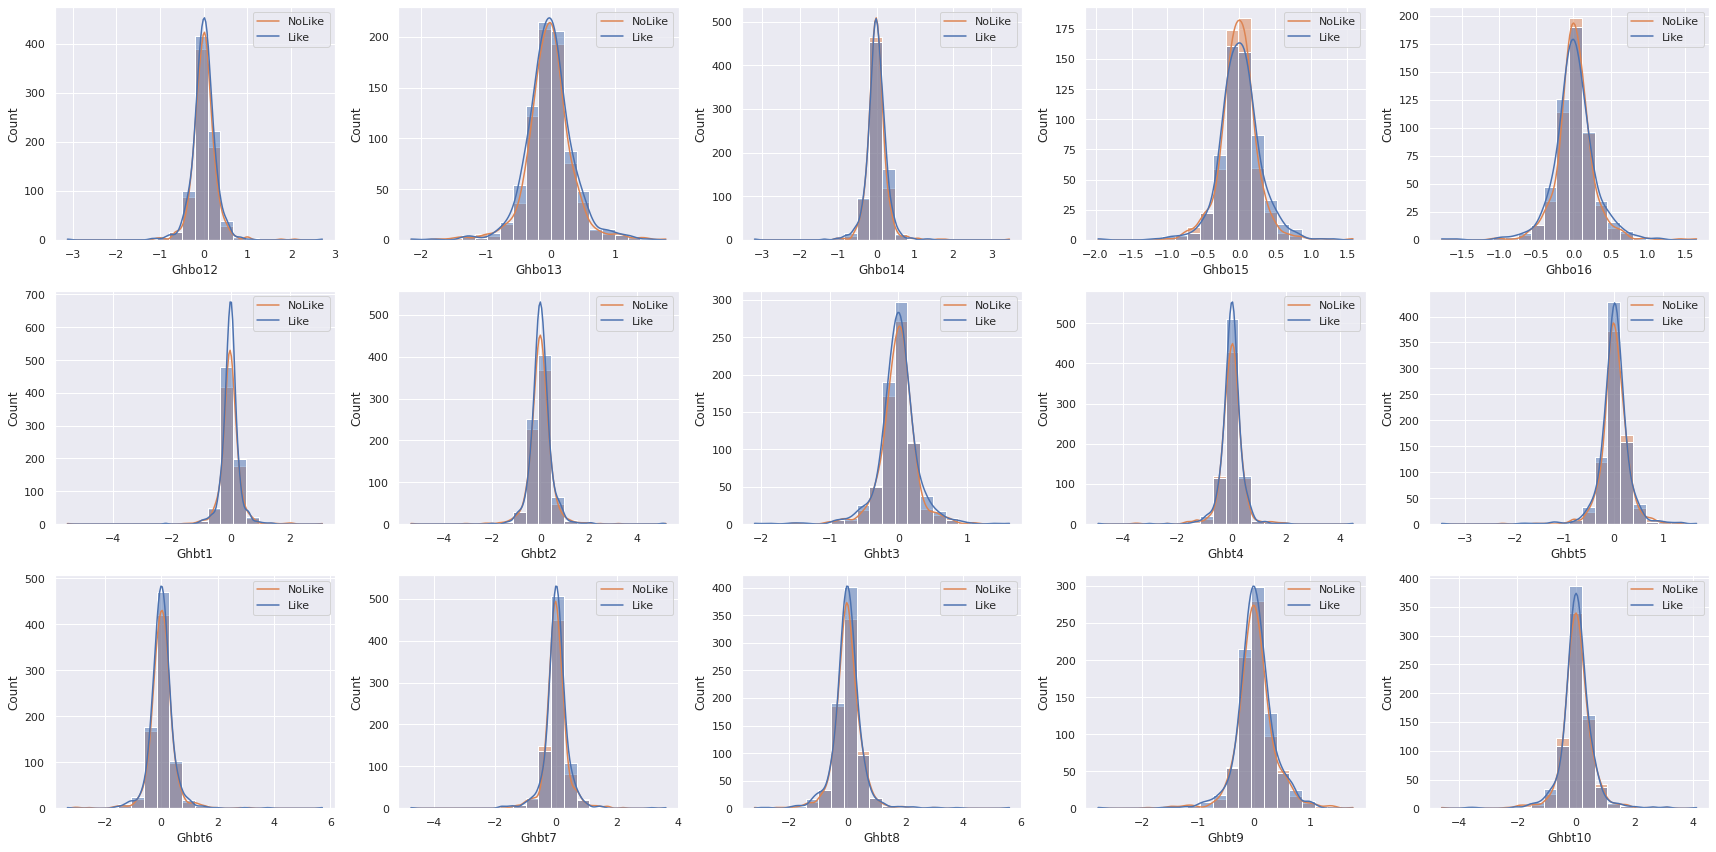

In [87]:
plt.rcParams["figure.figsize"] = (24,12)
sns.set(color_codes=True)
for i in range (47,62):
  ax = plt.subplot(3,5, i-46)
  plot = sns.histplot(x=numerical.iloc[:,i-1],bins=20, hue="Like_OR_Nolike",legend=False, data=numerical, kde=True, ax=ax)
  plt.legend(labels=['NoLike', 'Like'])
  
plt.tight_layout()
plt.show()

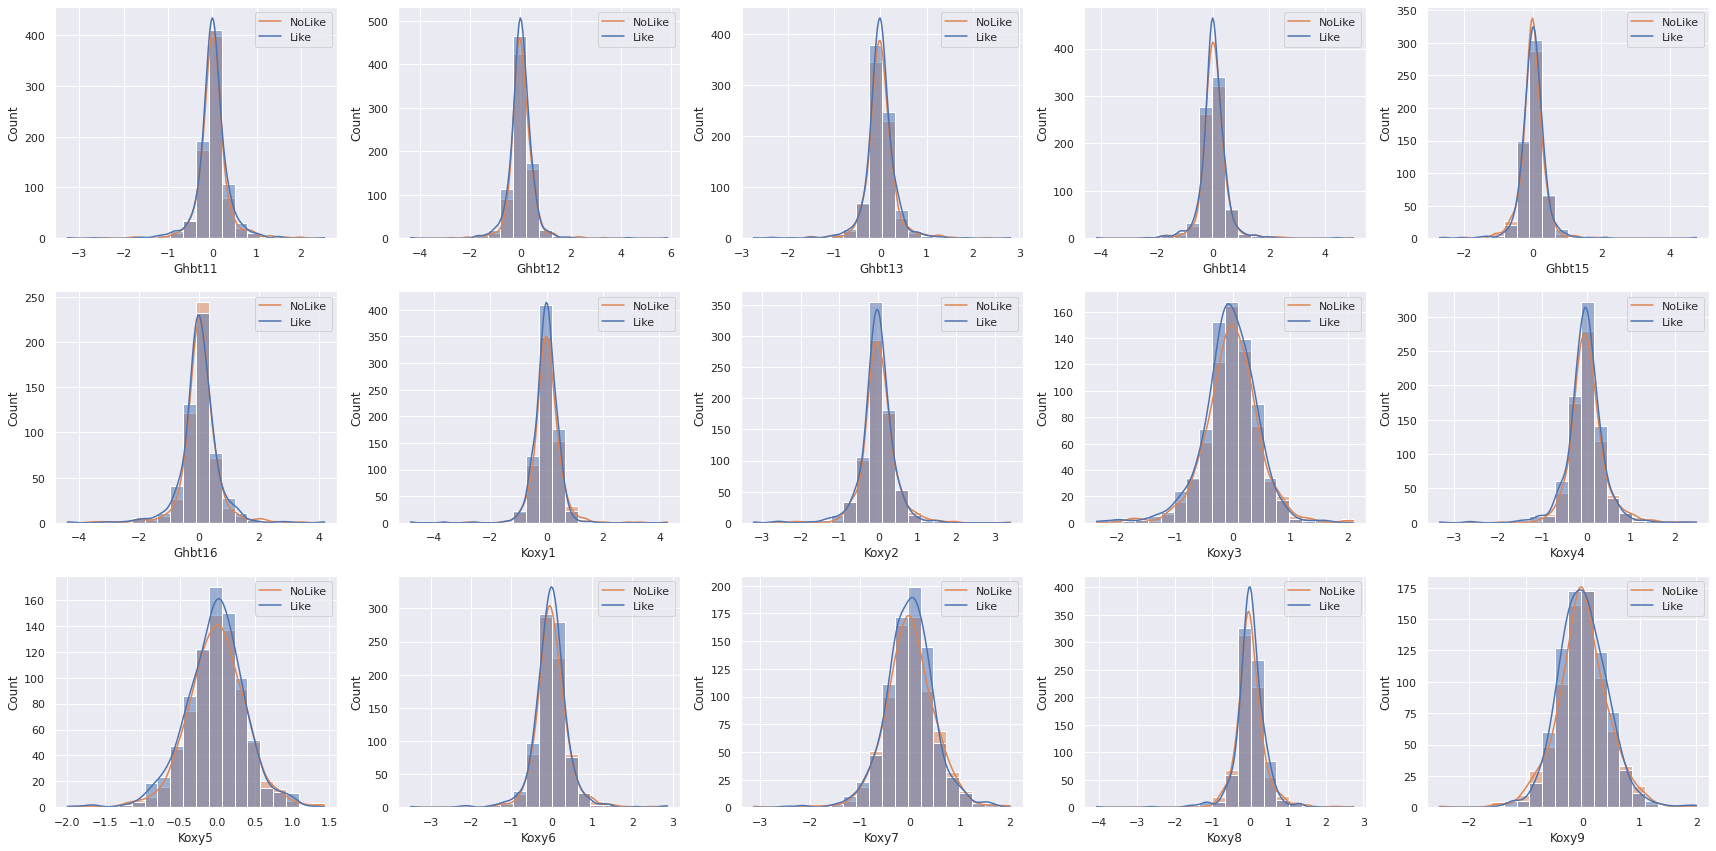

In [88]:
plt.rcParams["figure.figsize"] = (24,12)
sns.set(color_codes=True)
for i in range (62,77):
  ax = plt.subplot(3,5, i-61)
  plot = sns.histplot(x=numerical.iloc[:,i-1],bins=20, hue="Like_OR_Nolike",legend=False, data=numerical, kde=True, ax=ax)
  plt.legend(labels=['NoLike', 'Like'])
  
plt.tight_layout()
plt.show()

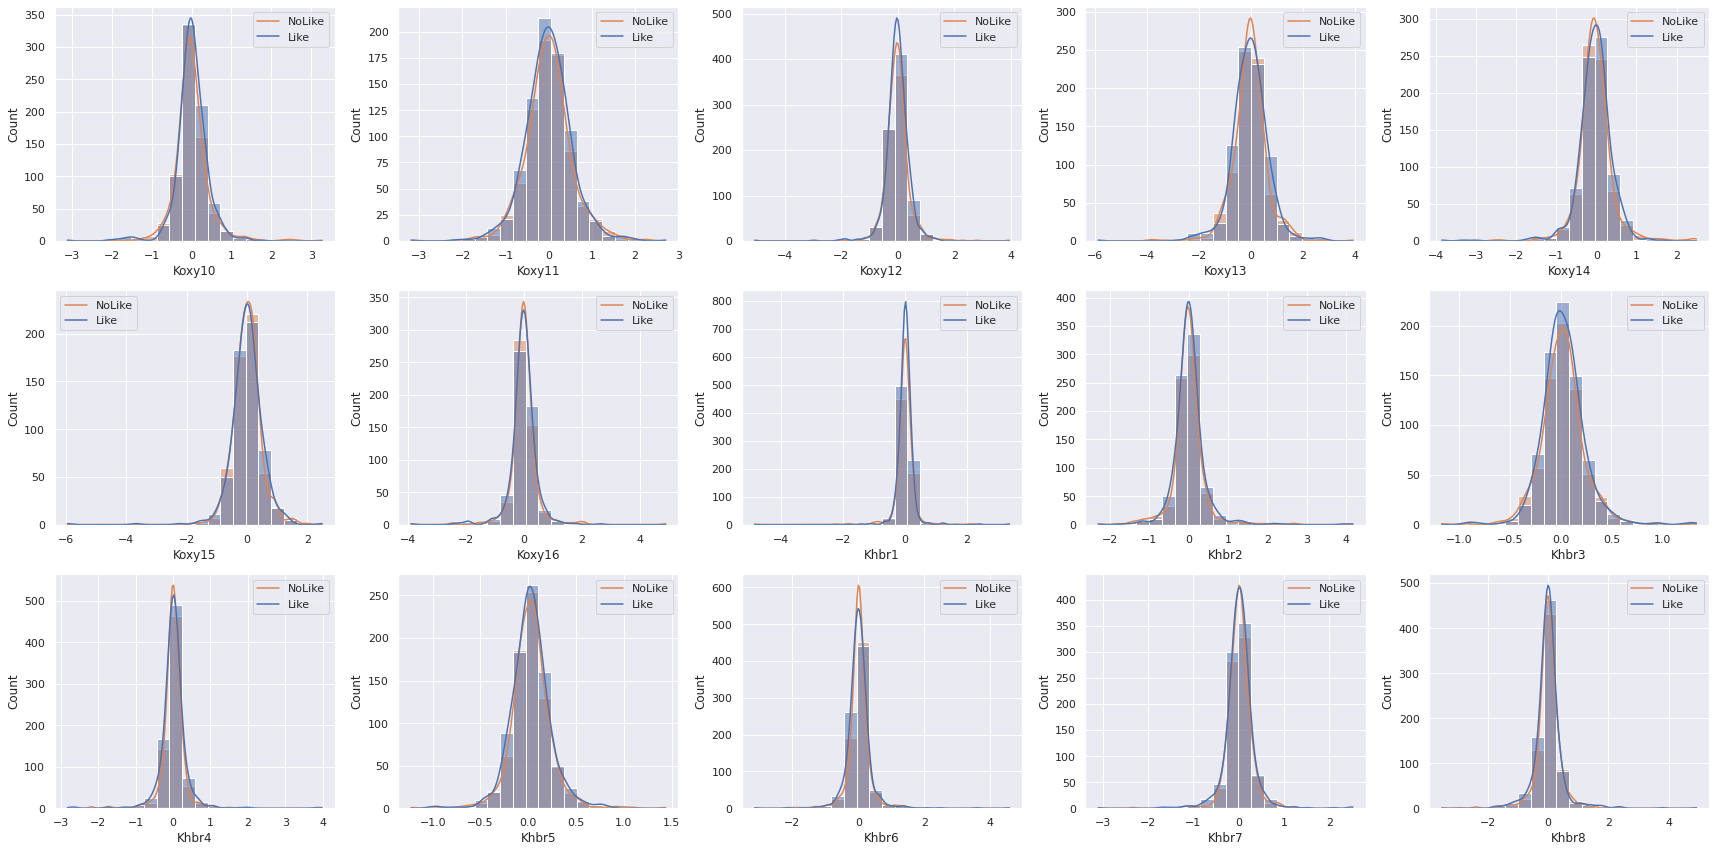

In [89]:
plt.rcParams["figure.figsize"] = (24,12)
sns.set(color_codes=True)
for i in range (77,92):
  ax = plt.subplot(3,5, i-76)
  plot = sns.histplot(x=numerical.iloc[:,i-1],bins=20, hue="Like_OR_Nolike",legend=False, data=numerical, kde=True, ax=ax)
  plt.legend(labels=['NoLike', 'Like'])
  
plt.tight_layout()
plt.show()

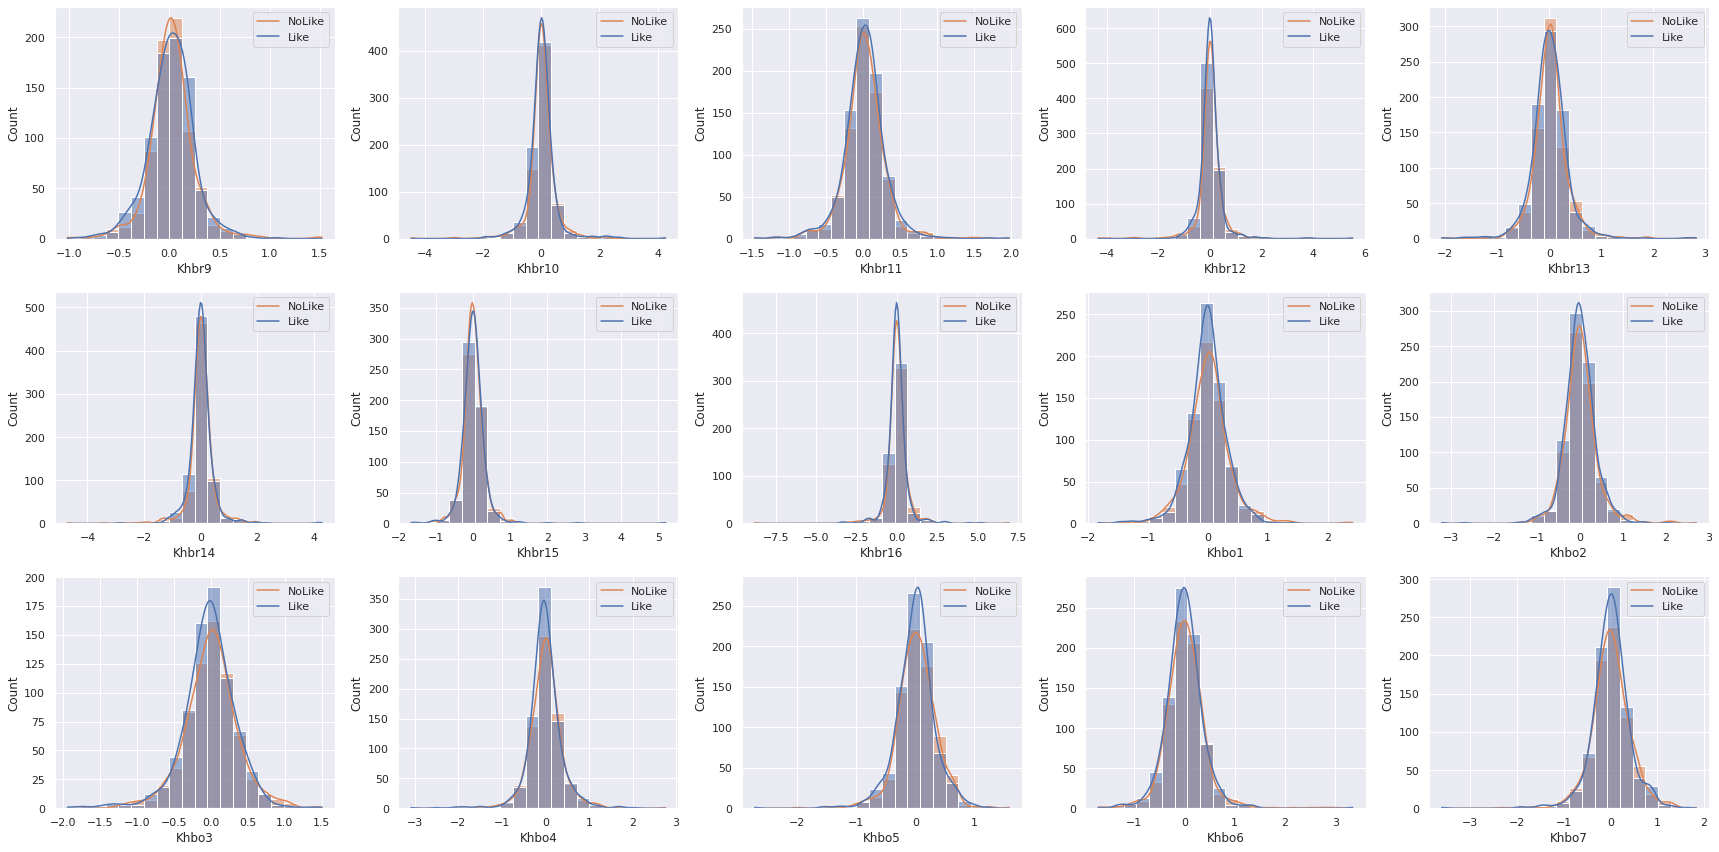

In [90]:
plt.rcParams["figure.figsize"] = (24,12)
sns.set(color_codes=True)
for i in range (92,107):
  ax = plt.subplot(3,5, i-91)
  plot = sns.histplot(x=numerical.iloc[:,i-1],bins=20, hue="Like_OR_Nolike",legend=False, data=numerical, kde=True, ax=ax)
  plt.legend(labels=['NoLike', 'Like'])
  
plt.tight_layout()
plt.show()

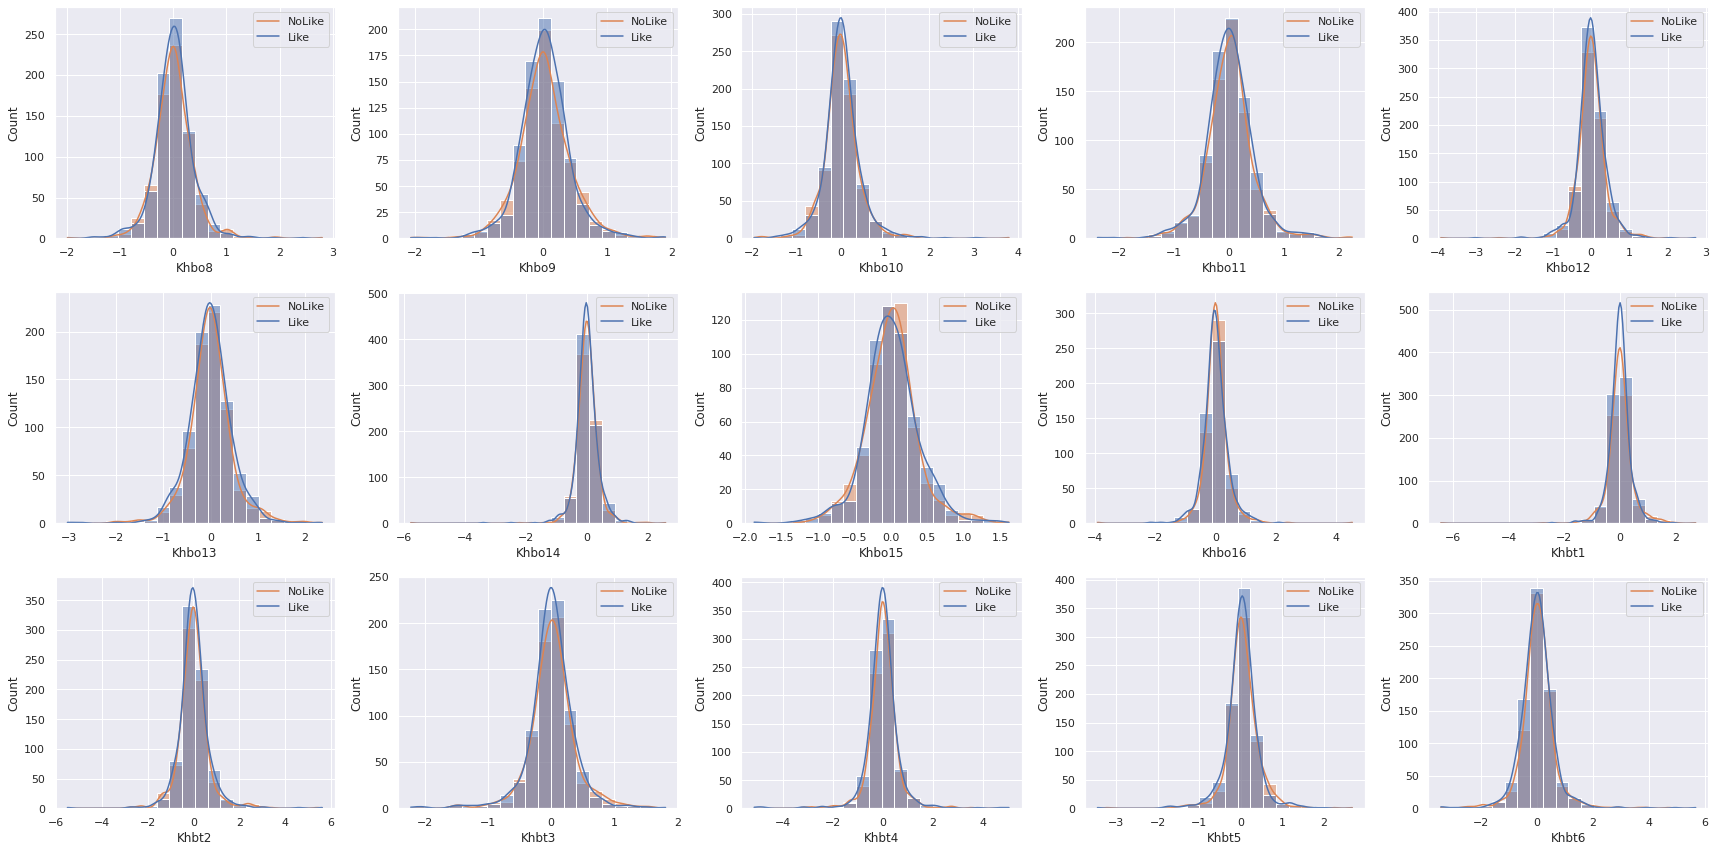

In [91]:
plt.rcParams["figure.figsize"] = (24,12)
sns.set(color_codes=True)
for i in range (107,122):
  ax = plt.subplot(3,5, i-106)
  plot = sns.histplot(x=numerical.iloc[:,i-1],bins=20, hue="Like_OR_Nolike",legend=False, data=numerical, kde=True, ax=ax)
  plt.legend(labels=['NoLike', 'Like'])
  
plt.tight_layout()
plt.show()

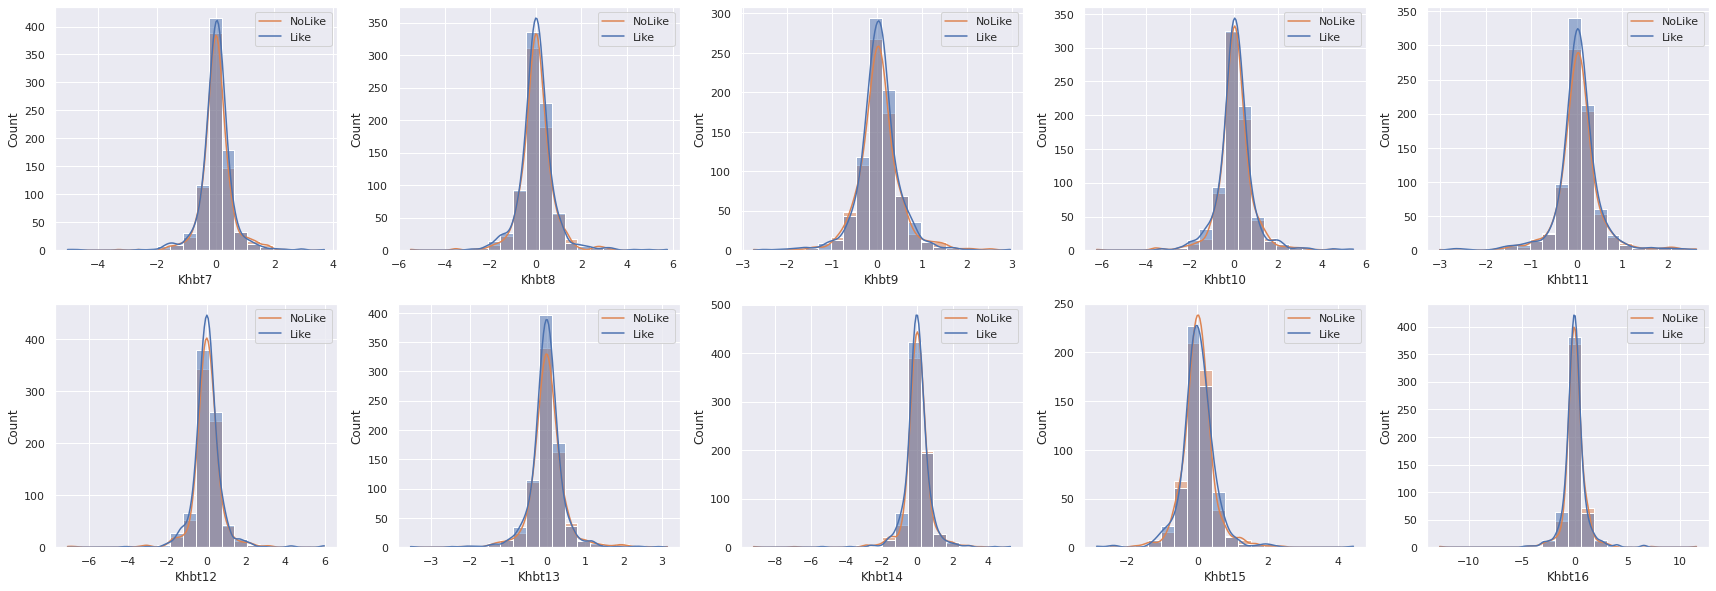

In [93]:
plt.rcParams["figure.figsize"] = (24,12)
sns.set(color_codes=True)
for i in range (122,132):
  ax = plt.subplot(3,5, i-121)
  plot = sns.histplot(x=numerical.iloc[:,i-1],bins=20, hue="Like_OR_Nolike",legend=False, data=numerical, kde=True, ax=ax)
  plt.legend(labels=['NoLike', 'Like'])
  
plt.tight_layout()
plt.show()

In [ ]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent],
                              axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = (mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 0] != 0].sort_values(
        '% of Total Values', ascending=False).round(1))

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [ ]:
missing_values_table(df)

Your selected dataframe has 137 columns.
There are 133 columns that have missing values.


,Missing Values,% of Total Values
Khbt16,511,30.4
Khbo16,511,30.4
Koxy16,511,30.4
Khbr16,511,30.4
Ghbr16,509,30.3
...,...,...
Ghbt5,2,0.1
Khbo7,1,0.1
Khbt7,1,0.1
Koxy7,1,0.1


In [ ]:
df.shape

(1680, 137)

In [ ]:
missing_values_table(df_last)

Your selected dataframe has 137 columns.
There are 128 columns that have missing values.


,Missing Values,% of Total Values
Khbt16,503,32.1
Khbr16,503,32.1
Koxy16,503,32.1
Khbo16,503,32.1
Ghbo16,501,32.0
...,...,...
Ghbr5,2,0.1
Koxy7,1,0.1
Khbo7,1,0.1
Khbt7,1,0.1


## Checking if there are Nan values left in non measurement features and then count missing measurement values

In [ ]:
df_last.isna().sum()
df_last.isna().sum().sum()

Part_No        0
Stim_ID        0
Y/K            0
Direction      0
RespTime       0
            ... 
Khbt12        31
Khbt13        29
Khbt14       106
Khbt15       454
Khbt16       503
Length: 137, dtype: int64

13718

In [ ]:
df_last_notLike = df_last[df_last['Like_OR_Nolike'] == False]

In [ ]:
df_last_notLike

,Part_No,Stim_ID,Y/K,Direction,RespTime,Response,Like_OR_Nolike,G1,G2,Goxy1,Goxy2,Goxy3,Goxy4,Goxy5,Goxy6,Goxy7,Goxy8,Goxy9,Goxy10,Goxy11,Goxy12,Goxy13,Goxy14,Goxy15,Goxy16,Ghbr1,Ghbr2,Ghbr3,Ghbr4,Ghbr5,Ghbr6,Ghbr7,Ghbr8,Ghbr9,Ghbr10,Ghbr11,Ghbr12,Ghbr13,Ghbr14,Ghbr15,Ghbr16,Ghbo1,Ghbo2,Ghbo3,Ghbo4,Ghbo5,Ghbo6,Ghbo7,Ghbo8,Ghbo9,Ghbo10,Ghbo11,Ghbo12,Ghbo13,Ghbo14,Ghbo15,Ghbo16,Ghbt1,Ghbt2,Ghbt3,Ghbt4,Ghbt5,Ghbt6,Ghbt7,Ghbt8,Ghbt9,Ghbt10,Ghbt11,Ghbt12,Ghbt13,Ghbt14,Ghbt15,Ghbt16,Koxy1,Koxy2,Koxy3,Koxy4,Koxy5,Koxy6,Koxy7,Koxy8,Koxy9,Koxy10,Koxy11,Koxy12,Koxy13,Koxy14,Koxy15,Koxy16,Khbr1,Khbr2,Khbr3,Khbr4,Khbr5,Khbr6,Khbr7,Khbr8,Khbr9,Khbr10,Khbr11,Khbr12,Khbr13,Khbr14,Khbr15,Khbr16,Khbo1,Khbo2,Khbo3,Khbo4,Khbo5,Khbo6,Khbo7,Khbo8,Khbo9,Khbo10,Khbo11,Khbo12,Khbo13,Khbo14,Khbo15,Khbo16,Khbt1,Khbt2,Khbt3,Khbt4,Khbt5,Khbt6,Khbt7,Khbt8,Khbt9,Khbt10,Khbt11,Khbt12,Khbt13,Khbt14,Khbt15,Khbt16
1,1,16.0,0.0,2.0,1459.0,Right,False,1,2,-0.016150,0.089965,-0.148061,0.206889,0.070859,0.378170,0.412107,0.325312,0.439381,0.417096,0.303118,0.397769,0.629696,0.427812,0.483460,0.208160,-0.048277,-0.208151,0.119465,-0.232437,-0.011533,-0.272199,-0.206342,-0.476173,-0.276975,-0.575903,-0.143816,-0.315825,-0.523744,-0.599519,-0.428484,-0.316551,-0.064427,-0.118186,-0.028596,-0.025547,0.059326,0.105971,0.205765,-0.150861,0.162406,-0.158807,0.159301,0.081944,0.105952,-0.171707,0.054975,-0.108391,-0.112703,-0.326338,0.090868,-0.257984,0.047793,-0.166229,-0.000578,-0.627035,-0.114569,-0.734710,0.015485,-0.233881,-0.417792,-0.771225,-0.373509,-0.424942,0.174428,0.653096,-0.038715,0.650251,0.175557,0.766687,0.819796,0.545715,0.706113,0.635638,0.500461,0.649931,0.412645,0.467408,0.471701,1.463744,-0.249283,-0.731326,0.160259,-0.528862,-0.040307,-0.479963,-0.354216,-0.706690,-0.334903,-0.812840,-0.184560,-0.441936,-0.368731,-0.705205,-0.498745,-2.332100,-0.074855,-0.078230,0.121545,0.121389,0.135250,0.286725,0.465580,-0.160975,0.371210,-0.177202,0.315901,0.207995,0.043914,-0.237797,-0.027044,-0.868356,-0.324137,-0.809556,0.281804,-0.407472,0.094943,-0.193238,0.111364,-0.867665,0.036307,-0.990043,0.131340,-0.233941,-0.324817,-0.943003,-0.525789,-3.200456
3,1,1.0,1.0,1.0,1073.0,Left,False,1,4,-0.171196,-0.102954,-0.875261,-0.000342,-0.337183,0.217429,0.020822,0.454714,0.233263,0.839838,-0.104713,0.503555,0.035672,0.926225,0.184096,0.786021,-0.099402,-0.441360,0.420930,-0.323090,0.189353,-0.532296,-0.005857,-0.762548,-0.052403,-0.918665,0.075824,-0.709362,-0.087954,-1.035489,-0.209049,-1.158090,-0.270597,-0.544314,-0.454330,-0.323432,-0.147830,-0.314867,0.014965,-0.307834,0.180860,-0.078826,-0.028890,-0.205807,-0.052281,-0.109264,-0.024954,-0.372069,-0.369999,-0.985674,-0.033400,-0.646521,0.041522,-0.847163,0.009108,-1.070382,0.128457,-0.997491,0.046934,-0.915169,-0.140235,-1.144753,-0.234003,-1.530159,-0.213702,0.101851,-0.864369,-0.020777,-0.392224,0.134953,-0.208951,0.347925,0.067846,0.784468,-0.266378,0.443826,-0.229802,0.850748,0.155352,1.158873,-0.053198,-0.704420,0.395649,-0.437197,0.156076,-0.628296,-0.004996,-0.789858,-0.012509,-0.957821,0.107769,-0.761388,0.004438,-1.095664,-0.260718,-1.962783,-0.266899,-0.602569,-0.468720,-0.457974,-0.236148,-0.493343,-0.213947,-0.441933,0.055337,-0.173353,-0.158609,-0.317562,-0.225364,-0.244915,-0.105366,-0.803910,-0.320097,-1.306990,-0.073071,-0.895170,-0.080073,-1.121639,-0.218943,-1.231791,0.042828,-1.131174,-0.050840,-1.078950,-0.220926,-1.340579,-0.366084,-2.766693
5,1,13.0,1.0,2.0,1032.0,Right,False,1,6,-0.157769,-0.131881,-0.130702,-0.119899,0.183395,0.133742,0.663423,0.371626,0.649885,0.407279,0.481765,0.141346,0.053663,-0.086834,-0.090411,-0.435021,0.154087,-0.116972,0.097887,0.127719,0.004732,-0.079551,-0.238360,-0.067118,-0.121218,-0.010910,-0.137637,-0.069001,-0.002125,0.114249,0.125962,0.807547,-0.003681,-0.248854,-0.032814,0.007820,0.188127,0.054190,0.425062,0.304508,0.528668,0.396369,0.344127,0.072345,0.051538,0.027414,0.035551,0.372527,0.150406,-0.365826,0.065073,0.135538,0.192858,-0.025361,0.186702,0.

In [ ]:
df_last_Like = df_last[df_last['Like_OR_Nolike'] == True]

In [ ]:
df_last_Like

,Part_No,Stim_ID,Y/K,Direction,RespTime,Response,Like_OR_Nolike,G1,G2,Goxy1,Goxy2,Goxy3,Goxy4,Goxy5,Goxy6,Goxy7,Goxy8,Goxy9,Goxy10,Goxy11,Goxy12,Goxy13,Goxy14,Goxy15,Goxy16,Ghbr1,Ghbr2,Ghbr3,Ghbr4,Ghbr5,Ghbr6,Ghbr7,Ghbr8,Ghbr9,Ghbr10,Ghbr11,Ghbr12,Ghbr13,Ghbr14,Ghbr15,Ghbr16,Ghbo1,Ghbo2,Ghbo3,Ghbo4,Ghbo5,Ghbo6,Ghbo7,Ghbo8,Ghbo9,Ghbo10,Ghbo11,Ghbo12,Ghbo13,Ghbo14,Ghbo15,Ghbo16,Ghbt1,Ghbt2,Ghbt3,Ghbt4,Ghbt5,Ghbt6,Ghbt7,Ghbt8,Ghbt9,Ghbt10,Ghbt11,Ghbt12,Ghbt13,Ghbt14,Ghbt15,Ghbt16,Koxy1,Koxy2,Koxy3,Koxy4,Koxy5,Koxy6,Koxy7,Koxy8,Koxy9,Koxy10,Koxy11,Koxy12,Koxy13,Koxy14,Koxy15,Koxy16,Khbr1,Khbr2,Khbr3,Khbr4,Khbr5,Khbr6,Khbr7,Khbr8,Khbr9,Khbr10,Khbr11,Khbr12,Khbr13,Khbr14,Khbr15,Khbr16,Khbo1,Khbo2,Khbo3,Khbo4,Khbo5,Khbo6,Khbo7,Khbo8,Khbo9,Khbo10,Khbo11,Khbo12,Khbo13,Khbo14,Khbo15,Khbo16,Khbt1,Khbt2,Khbt3,Khbt4,Khbt5,Khbt6,Khbt7,Khbt8,Khbt9,Khbt10,Khbt11,Khbt12,Khbt13,Khbt14,Khbt15,Khbt16
0,1,36.0,0.0,2.0,2292.0,Left,True,1,1,0.530860,0.571811,0.876945,0.895395,0.618246,0.775132,1.141467,0.017443,0.231609,-0.084973,0.011109,-0.082605,-1.784506,-0.598040,-0.671195,NaN,-0.439243,-0.498822,-0.564051,-0.807433,-0.413861,-0.650190,-0.978439,-0.074692,-0.243569,0.039038,0.121672,0.054662,1.092793,0.388220,0.384527,NaN,0.091617,0.072988,0.312894,0.087962,0.204385,0.124942,0.163028,-0.057249,-0.011960,-0.045935,0.132781,-0.027944,-0.691713,-0.209819,-0.286668,NaN,-0.347626,-0.425834,-0.251157,-0.719471,-0.209475,-0.525248,-0.815411,-0.131941,-0.255529,-0.006897,0.254454,0.026718,0.401080,0.178401,0.097859,NaN,0.811057,1.100687,1.334711,1.311974,0.809818,0.952328,1.423814,0.018645,0.260361,-0.240256,-0.078202,-0.035370,-2.348474,-0.714057,-0.741101,NaN,-0.646730,-0.564837,-0.882807,-0.951400,-0.544274,-0.603159,-1.220996,0.072544,-0.353696,0.268320,0.150834,0.116103,1.461363,0.591867,0.453544,NaN,0.164326,0.535850,0.451904,0.360574,0.265544,0.349169,0.202817,0.091189,-0.093334,0.028064,0.072632,0.080733,-0.887111,-0.122190,-0.287557,NaN,-0.482404,-0.028987,-0.430903,-0.590826,-0.278730,-0.253990,-1.018179,0.163734,-0.447030,0.296384,0.223466,0.196836,0.574252,0.469677,0.165987,NaN
2,1,42.0,0.0,2.0,970.0,Left,True,1,3,-0.136447,-0.272634,-0.322293,-0.284869,-0.168651,-0.220061,-0.561465,-0.030628,-0.085240,0.279583,0.185449,0.248090,0.449046,0.604036,0.395534,0.301781,0.115040,0.660709,0.119293,0.232511,0.163833,0.103896,0.329422,0.097941,0.002345,-0.065501,-0.122785,-0.246533,-0.138044,-0.383889,-0.125328,-0.081074,-0.021407,0.388075,-0.203000,-0.052358,-0.004818,-0.116165,-0.232043,0.067314,-0.082895,0.214081,0.062664,0.001557,0.311002,0.220147,0.270206,0.220707,0.093633,1.048784,-0.083707,0.180153,0.159015,-0.012269,0.097379,0.165255,-0.080550,0.148580,-0.060121,-0.244976,0.172957,-0.163742,0.144877,0.139633,0.282411,0.064885,0.454139,0.259362,0.431352,0.287118,0.094820,0.439876,-0.284129,0.363272,-0.219946,0.308470,-0.543672,0.077329,0.059039,0.083751,-0.152114,0.542451,-0.182078,0.009384,0.039956,-0.004640,0.229157,-0.068781,0.531488,0.114320,0.479081,-0.079169,0.637054,-0.129024,0.096418,-0.135218,0.130297,0.607335,0.272061,0.268746,0.471308,0.282478,0.323977,0.371096,0.247360,0.477592,0.259134,0.229301,0.093382,-0.051695,0.155457,-0.051467,-0.021817,1.149786,0.089983,0.278130,0.511265,0.277837,0.553134,0.302315,0.778848,0.591912,0.738215,0.150131,0.730436,-0.180719,0.251875,-0.186686
4,1,46.0,0.0,2.0,745.0,Left,True,1,5,-0.212047,-0.366153,-0.342529,-0.316131,-0.423417,-0.224753,-0.476353,-0.021907,-0.269171,-0.060163,-0.368411,-0.162705,-0.365288,-0.052181,-0.324225,-0.934540,0.137627,0.467511,-0.023956,0.048424,0.147062,-0.023436,0.139948,-0.008951,-0.037714,-0.004652,0.027158,-0.129309,0.054662,-0.096996,0.184951,1.800187,-0.074420,0.101358,-0.366485,-0.267707,-0.276355,-0.248189,-0.336405,-0.030858,-0.306885,-0.064815,-0.341253,-0.292014,-0.310626,-0.149177,-0.139274,0.865647,0.063207,0.568869,-0.390440,-0.219283,-0.129293,-0.271625,-0.196457,-0.039808,-0.344599,-0.069466,-0.314095,-0.421323,-0.255964,-0.246174,0.045677,2.665835,-0.2

### 1.1 Outlier Detection

Text(0.5, 1.0, 'Boxplot for Outlier Detection')

Text(0.5, 0, 'Measurement Variable')

Text(0, 0.5, 'Value')

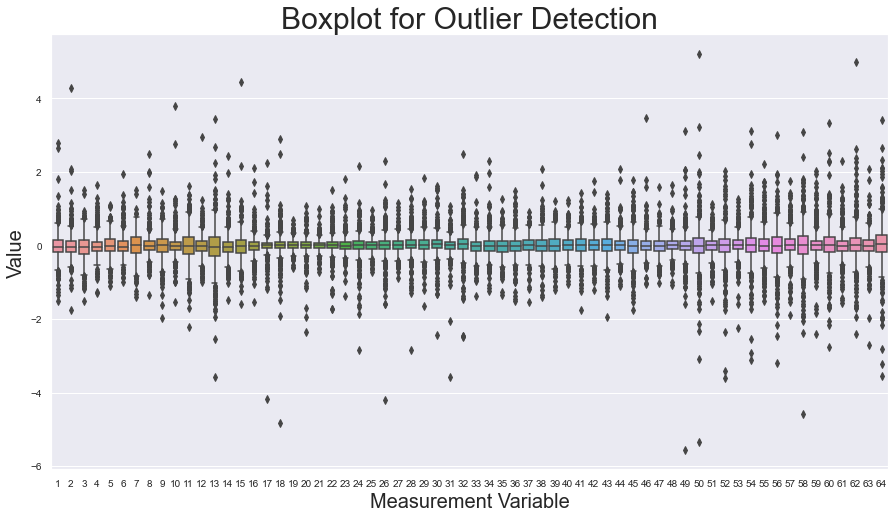

In [ ]:
# boxplot of measurements divided into two dataframes to clearly see their outliers

sns.set(rc={'figure.figsize':(15,8)})

df_last_1 = df_last_notLike[df_last_notLike.columns[9:73]]
df_last_1.columns = range(1, df_last_1.shape[1]+1)
df_last_1 = pd.melt(df_last_1)

df_last_2 = df_last_Like[df_last_Like.columns[73:]]
df_last_2.columns = range(65, df_last_2.shape[1]+65)
df_last_2 = pd.melt(df_last_2)

a = sns.boxplot(x="variable", y="value", data=df_last_1)
a.axes.set_title("Boxplot for Outlier Detection",fontsize=30)
a.set_xlabel("Measurement Variable",fontsize=20)
a.set_ylabel("Value",fontsize=20)
a.tick_params(labelsize=10)

Text(0.5, 1.0, 'Boxplot for Outlier Detection')

Text(0.5, 0, 'Measurement Variable')

Text(0, 0.5, 'Value')

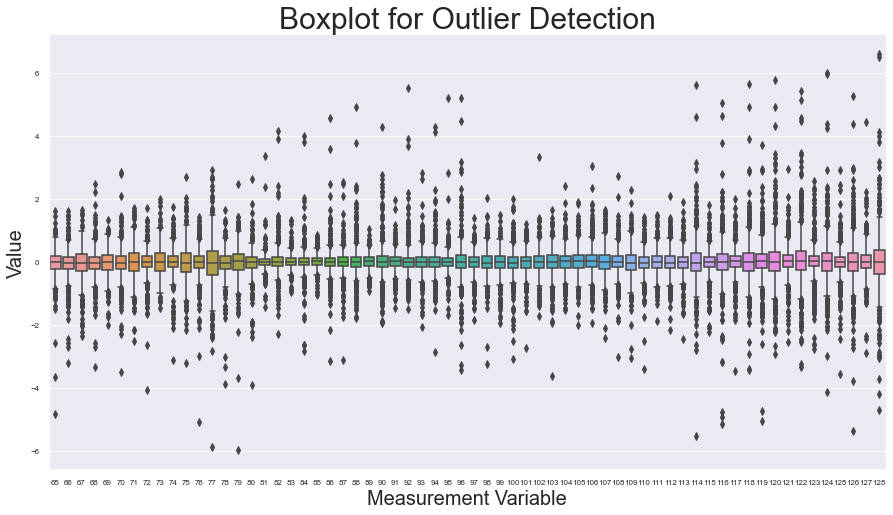

In [ ]:
a = sns.boxplot(x="variable", y="value", data=df_last_2)
a.axes.set_title("Boxplot for Outlier Detection",fontsize=30)
a.set_xlabel("Measurement Variable",fontsize=20)
a.set_ylabel("Value",fontsize=20)
a.tick_params(labelsize=8)

In [ ]:
#for column in df_last[df_last.columns[9:]]:
#    plt.figure()
 #   df.boxplot([column])

In [ ]:
#df_last[df_last.columns[9:]].plot(kind='box')

#### 1.1.1 Outlier Removal with IQR

In [ ]:
df_last_notLike.describe()
df_last_Like.describe()

,Part_No,Stim_ID,Y/K,Direction,RespTime,G1,G2,Goxy1,Goxy2,Goxy3,Goxy4,Goxy5,Goxy6,Goxy7,Goxy8,Goxy9,Goxy10,Goxy11,Goxy12,Goxy13,Goxy14,Goxy15,Goxy16,Ghbr1,Ghbr2,Ghbr3,Ghbr4,Ghbr5,Ghbr6,Ghbr7,Ghbr8,Ghbr9,Ghbr10,Ghbr11,Ghbr12,Ghbr13,Ghbr14,Ghbr15,Ghbr16,Ghbo1,Ghbo2,Ghbo3,Ghbo4,Ghbo5,Ghbo6,Ghbo7,Ghbo8,Ghbo9,Ghbo10,Ghbo11,Ghbo12,Ghbo13,Ghbo14,Ghbo15,Ghbo16,Ghbt1,Ghbt2,Ghbt3,Ghbt4,Ghbt5,Ghbt6,Ghbt7,Ghbt8,Ghbt9,Ghbt10,Ghbt11,Ghbt12,Ghbt13,Ghbt14,Ghbt15,Ghbt16,Koxy1,Koxy2,Koxy3,Koxy4,Koxy5,Koxy6,Koxy7,Koxy8,Koxy9,Koxy10,Koxy11,Koxy12,Koxy13,Koxy14,Koxy15,Koxy16,Khbr1,Khbr2,Khbr3,Khbr4,Khbr5,Khbr6,Khbr7,Khbr8,Khbr9,Khbr10,Khbr11,Khbr12,Khbr13,Khbr14,Khbr15,Khbr16,Khbo1,Khbo2,Khbo3,Khbo4,Khbo5,Khbo6,Khbo7,Khbo8,Khbo9,Khbo10,Khbo11,Khbo12,Khbo13,Khbo14,Khbo15,Khbo16,Khbt1,Khbt2,Khbt3,Khbt4,Khbt5,Khbt6,Khbt7,Khbt8,Khbt9,Khbt10,Khbt11,Khbt12,Khbt13,Khbt14,Khbt15,Khbt16
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,684.000000,701.000000,678.000000,706.000000,744.000000,742.000000,744.000000,713.000000,745.000000,717.000000,744.000000,726.000000,730.000000,706.000000,549.000000,514.000000,680.000000,701.000000,678.000000,706.000000,744.000000,742.000000,744.000000,713.000000,745.000000,717.000000,744.000000,726.000000,730.000000,706.000000,549.000000,514.000000,680.000000,701.000000,678.000000,706.000000,744.000000,742.000000,744.000000,713.000000,745.000000,717.000000,744.000000,726.000000,730.000000,706.000000,549.000000,514.000000,680.000000,701.000000,678.000000,706.000000,744.000000,742.000000,744.000000,713.000000,745.000000,717.000000,744.000000,726.000000,730.000000,706.000000,549.000000,514.000000,679.000000,696.000000,678.000000,705.000000,744.000000,742.000000,745.000000,710.000000,745.000000,714.000000,744.000000,728.000000,730.000000,705.000000,547.000000,518.000000,679.000000,696.000000,678.000000,705.000000,744.000000,742.000000,745.000000,710.000000,745.000000,714.000000,744.000000,728.000000,730.000000,705.000000,547.000000,518.000000,679.000000,696.000000,678.000000,705.000000,744.000000,742.000000,745.000000,710.000000,745.000000,714.000000,744.000000,728.000000,730.000000,705.000000,547.000000,518.000000,679.000000,696.000000,678.000000,705.000000,744.000000,742.000000,745.000000,710.000000,745.000000,714.000000,744.000000,728.000000,730.000000,705.000000,547.000000,518.000000
mean,14.404027,29.467114,0.551678,1.460403,1124.111409,14.404027,31.335570,-0.024227,-0.010695,-0.044409,-0.012030,0.003235,-0.002657,0.001878,0.011059,0.005124,0.008198,-0.001048,-0.021148,-0.044078,-0.035351,-0.011872,-0.014491,0.003766,0.005844,0.019577,0.003691,0.007583,0.010257,0.005649,-0.005268,0.011159,0.005869,0.010966,0.029007,0.024630,0.040808,0.000705,0.034820,-0.019966,-0.004851,-0.024831,-0.008339,0.010818,0.007600,0.007528,0.005791,0.016283,0.014067,0.009919,0.007859,-0.019448,0.005456,-0.011167,0.020329,-0.016200,0.000993,-0.005254,-0.004648,0.018401,0.017857,0.013177,0.000523,0.027442,0.019936,0.020885,0.036865,0.005182,0.046264,-0.010462,0.055149,0.027600,0.024473,-0.011888,0.017117,-0.004314,0.009742,0.003237,0.008349,0.000558,0.004767,-0.001392,-0.003732,-0.028852,-0.023895,0.003620,0.010061,-0.010792,-0.006885,0.018872,-0.002996,0.028424,0.015747,0.015100,0.007391,0.024534,0.019817,0.022371,0.008333,0.028355,0.015241,0.008011,0.020805,0.016808,0.017588,0.006984,0.014121,0.024110,0.025488,0.018337,0.015740,0.025092,0.024584,0.020979,0.004601,-0.000497,-0.008653,0.011631,0.030865,0.006015,0.010703,0.025856,0.011125,0.052534,0.041235,0.033437,0.023131,0.049626,0.044401,0.043350,0.012934,0.027859,0.006588,0.019642,0.051670
std,8.067540,17.343131,0.497656,0.498764,430.262413,8.067540,17.237045,0.352419,0.340829,0.341980,0.280025,0.281788,0.275558,0.344091,0.282257,0.338577,0.315551,0.410284,0.282370,0.532095,0.308981,0.380813,0.281126,0.264497,0.344172,0.145726,0.235443,0.145673,0.236917,0.205593,0.307335,0.172939,0.342915,0.207935,0.280635,0.260991,0.298608,0.267020,0.399813,0.271464,0.294648,0.

,Part_No,Stim_ID,Y/K,Direction,RespTime,G1,G2,Goxy1,Goxy2,Goxy3,Goxy4,Goxy5,Goxy6,Goxy7,Goxy8,Goxy9,Goxy10,Goxy11,Goxy12,Goxy13,Goxy14,Goxy15,Goxy16,Ghbr1,Ghbr2,Ghbr3,Ghbr4,Ghbr5,Ghbr6,Ghbr7,Ghbr8,Ghbr9,Ghbr10,Ghbr11,Ghbr12,Ghbr13,Ghbr14,Ghbr15,Ghbr16,Ghbo1,Ghbo2,Ghbo3,Ghbo4,Ghbo5,Ghbo6,Ghbo7,Ghbo8,Ghbo9,Ghbo10,Ghbo11,Ghbo12,Ghbo13,Ghbo14,Ghbo15,Ghbo16,Ghbt1,Ghbt2,Ghbt3,Ghbt4,Ghbt5,Ghbt6,Ghbt7,Ghbt8,Ghbt9,Ghbt10,Ghbt11,Ghbt12,Ghbt13,Ghbt14,Ghbt15,Ghbt16,Koxy1,Koxy2,Koxy3,Koxy4,Koxy5,Koxy6,Koxy7,Koxy8,Koxy9,Koxy10,Koxy11,Koxy12,Koxy13,Koxy14,Koxy15,Koxy16,Khbr1,Khbr2,Khbr3,Khbr4,Khbr5,Khbr6,Khbr7,Khbr8,Khbr9,Khbr10,Khbr11,Khbr12,Khbr13,Khbr14,Khbr15,Khbr16,Khbo1,Khbo2,Khbo3,Khbo4,Khbo5,Khbo6,Khbo7,Khbo8,Khbo9,Khbo10,Khbo11,Khbo12,Khbo13,Khbo14,Khbo15,Khbo16,Khbt1,Khbt2,Khbt3,Khbt4,Khbt5,Khbt6,Khbt7,Khbt8,Khbt9,Khbt10,Khbt11,Khbt12,Khbt13,Khbt14,Khbt15,Khbt16
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.00000,767.000000,768.000000,756.000000,789.000000,819.000000,815.000000,817.000000,782.000000,814.000000,767.000000,817.000000,807.000000,808.000000,752.000000,568.000000,550.000000,765.000000,768.000000,756.000000,789.000000,819.000000,815.000000,817.000000,782.000000,814.000000,767.000000,817.000000,807.000000,808.000000,752.000000,568.000000,550.000000,765.000000,768.000000,756.000000,789.000000,819.000000,815.000000,817.000000,782.000000,814.000000,767.000000,817.000000,807.000000,808.000000,752.000000,568.000000,550.000000,765.000000,768.000000,756.000000,789.000000,819.000000,815.000000,817.000000,782.000000,814.000000,767.000000,817.000000,807.000000,808.000000,752.000000,568.000000,550.000000,763.000000,769.000000,756.000000,794.000000,818.000000,816.000000,819.000000,784.000000,812.000000,766.000000,815.000000,806.000000,806.000000,754.000000,564.000000,544.000000,763.000000,769.000000,756.000000,794.000000,818.000000,816.000000,819.000000,784.000000,812.000000,766.000000,815.000000,806.000000,806.000000,754.000000,564.000000,544.000000,763.000000,769.000000,756.000000,794.000000,818.000000,816.000000,819.000000,784.000000,812.000000,766.000000,815.000000,806.000000,806.000000,754.000000,564.000000,544.000000,763.000000,769.000000,756.000000,794.000000,818.000000,816.000000,819.000000,784.000000,812.000000,766.000000,815.000000,806.000000,806.000000,754.000000,564.000000,544.000000
mean,16.309756,31.392683,0.446341,1.507317,1107.315854,16.309756,29.89878,-0.040433,-0.032083,-0.054191,-0.025479,-0.008969,-0.009465,-0.001392,0.014619,0.013858,0.020672,-0.005494,-0.017638,-0.026197,-0.025004,-0.004377,-0.007934,0.013763,0.027179,0.022845,0.011592,0.009757,0.014563,0.008375,-0.001084,0.003990,0.004775,0.009531,0.020686,0.009219,0.020959,0.009997,0.016914,-0.026241,-0.004904,-0.031346,-0.013887,0.000788,0.005098,0.006984,0.013535,0.017848,0.025447,0.004037,0.003049,-0.016978,-0.004045,0.005621,0.008980,-0.012477,0.022275,-0.008501,-0.002295,0.010545,0.019661,0.015359,0.012451,0.021837,0.030222,0.013567,0.023735,-0.007758,0.016914,0.015618,0.025894,-0.025655,-0.032522,-0.050504,-0.031977,-0.026062,-0.016682,-0.004506,0.000737,0.004913,0.007428,-0.010412,-0.015111,-0.026012,-0.036335,-0.002024,-0.018686,0.013164,0.024345,0.027305,0.012311,0.023545,0.015427,0.013080,0.019731,0.016164,0.028592,0.019383,0.025419,0.010845,0.021576,0.011468,0.019702,-0.012490,-0.008177,-0.023199,-0.019666,-0.002516,-0.001254,0.008574,0.020468,0.021078,0.036019,0.008971,0.010308,-0.015167,-0.014760,0.009445,0.001016,0.000674,0.016169,0.004106,-0.007356,0.021029,0.014173,0.021654,0.040199,0.037242,0.064611,0.028353,0.035726,-0.004322,0.006816,0.020913,0.020718
std,8.465928,17.237250,0.497416,0.500252,429.176912,8.465928,17.14474,0.324715,0.318063,0.362533,0.337241,0.305703,0.350980,0.393175,0.286376,0.335730,0.260336,0.431611,0.322323,0.535824,0.316100,0.458979,0.289946,0.176026,0.283828,0.158697,0.268304,0.157071,0.303295,0.254054,0.348779,0.173005,0.327066,0.226457,0.314460,0.276880,0.297341,0.321315,0.401071,0.248873,

In [ ]:
Q1 = df_last[df_last.columns[9:]].quantile(0.25)
Q3 = df_last[df_last.columns[9:]].quantile(0.75)
IQR = Q3 - Q1
# print(Q1, Q3, IQR_notLike)

Q1_notLike = df_last_notLike[df_last_notLike.columns[9:]].quantile(0.25)
Q3_notLike = df_last_notLike[df_last_notLike.columns[9:]].quantile(0.75)
IQR_notLike = Q3_notLike - Q1_notLike
# print(Q1, Q3, IQR_notLike)

Q1_Like = df_last_Like[df_last_Like.columns[9:]].quantile(0.25)
Q3_Like = df_last_Like[df_last_Like.columns[9:]].quantile(0.75)
IQR_Like = Q3_Like - Q1_Like
# print(Q1, Q3, IQR_Like)

In [ ]:
# Outlier dataframe, True means it is an outlier

# total df
df_out = (df_last[df_last.columns[9:]] < (Q1 - 1.5 * IQR)) | (df_last[df_last.columns[9:]] > (Q3 + 1.5 * IQR))

true_count = ( df_out == True ).sum(axis=1).sum()
false_count = ( df_out == False ).sum(axis=1).sum()

print("True count: {} False Count: {}".format(true_count,false_count))

# split into like/not like

df_out_notLike = (df_last_notLike[df_last_notLike.columns[9:]] < (Q1_notLike - 1.5 * IQR_notLike)) | (df_last_notLike[df_last_notLike.columns[9:]] > (Q3_notLike + 1.5 * IQR_notLike))

true_count = ( df_out_notLike == True ).sum(axis=1).sum()
false_count = ( df_out_notLike == False ).sum(axis=1).sum()

print("True count: {} False Count: {}".format(true_count,false_count))

df_out_Like = (df_last_Like[df_last_Like.columns[9:]] < (Q1_Like - 1.5 * IQR_Like)) | (df_last_Like[df_last_Like.columns[9:]] > (Q3_Like + 1.5 * IQR_Like))

true_count = ( df_out_Like == True ).sum(axis=1).sum()
false_count = ( df_out_Like == False ).sum(axis=1).sum()

print("True count: {} False Count: {}".format(true_count,false_count))



True count: 11611 False Count: 188709
True count: 5674 False Count: 89686
True count: 5918 False Count: 99042


In [ ]:
# to check if all values of a row has outlier

print(df_out_notLike.shape, df_out_notLike[~df_out_notLike.all(1)].shape)
print(df_out_Like.shape, df_out_Like[~df_out_Like.all(1)].shape)

(1565, 128) (1565, 128)


There are not any row with all values consist an outlier

In [ ]:
# Remove any row which has single or more outliers

df_last_mea = df_last[df_last.columns[9:]]

df_last_out = df_last_mea[~((df_last_mea < (Q1 - 1.5 * IQR)) |(df_last_mea > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_last_mea.shape, df_last_out.shape)

(1565, 128) (656, 128)


In [ ]:
df_last_out.describe()

,Goxy1,Goxy2,Goxy3,Goxy4,Goxy5,Goxy6,Goxy7,Goxy8,Goxy9,Goxy10,Goxy11,Goxy12,Goxy13,Goxy14,Goxy15,Goxy16,Ghbr1,Ghbr2,Ghbr3,Ghbr4,Ghbr5,Ghbr6,Ghbr7,Ghbr8,Ghbr9,Ghbr10,Ghbr11,Ghbr12,Ghbr13,Ghbr14,Ghbr15,Ghbr16,Ghbo1,Ghbo2,Ghbo3,Ghbo4,Ghbo5,Ghbo6,Ghbo7,Ghbo8,Ghbo9,Ghbo10,Ghbo11,Ghbo12,Ghbo13,Ghbo14,Ghbo15,Ghbo16,Ghbt1,Ghbt2,Ghbt3,Ghbt4,Ghbt5,Ghbt6,Ghbt7,Ghbt8,Ghbt9,Ghbt10,Ghbt11,Ghbt12,Ghbt13,Ghbt14,Ghbt15,Ghbt16,Koxy1,Koxy2,Koxy3,Koxy4,Koxy5,Koxy6,Koxy7,Koxy8,Koxy9,Koxy10,Koxy11,Koxy12,Koxy13,Koxy14,Koxy15,Koxy16,Khbr1,Khbr2,Khbr3,Khbr4,Khbr5,Khbr6,Khbr7,Khbr8,Khbr9,Khbr10,Khbr11,Khbr12,Khbr13,Khbr14,Khbr15,Khbr16,Khbo1,Khbo2,Khbo3,Khbo4,Khbo5,Khbo6,Khbo7,Khbo8,Khbo9,Khbo10,Khbo11,Khbo12,Khbo13,Khbo14,Khbo15,Khbo16,Khbt1,Khbt2,Khbt3,Khbt4,Khbt5,Khbt6,Khbt7,Khbt8,Khbt9,Khbt10,Khbt11,Khbt12,Khbt13,Khbt14,Khbt15,Khbt16
count,626.000000,624.000000,619.000000,612.000000,656.000000,656.000000,656.000000,643.000000,656.000000,629.000000,656.000000,656.000000,650.000000,618.000000,470.000000,409.000000,622.000000,624.000000,619.000000,612.000000,656.000000,656.000000,656.000000,643.000000,656.000000,629.000000,656.000000,656.000000,650.000000,618.000000,470.000000,409.000000,622.000000,624.000000,619.000000,612.000000,656.000000,656.000000,656.000000,643.000000,656.000000,629.000000,656.000000,656.000000,650.000000,618.000000,470.000000,409.000000,622.000000,624.000000,619.000000,612.000000,656.000000,656.000000,656.000000,643.000000,656.000000,629.000000,656.000000,656.000000,650.000000,618.000000,470.000000,409.000000,622.000000,622.000000,620.000000,612.000000,656.000000,656.000000,656.000000,645.000000,656.000000,628.000000,656.000000,656.000000,650.000000,617.000000,470.000000,410.000000,622.000000,622.000000,620.000000,612.000000,656.000000,656.000000,656.000000,645.000000,656.000000,628.000000,656.000000,656.000000,650.000000,617.000000,470.000000,410.000000,622.000000,622.000000,620.000000,612.000000,656.000000,656.000000,656.000000,645.000000,656.000000,628.000000,656.000000,656.000000,650.000000,617.000000,470.000000,410.000000,622.000000,622.000000,620.000000,612.000000,656.000000,656.000000,656.000000,645.000000,656.000000,628.000000,656.000000,656.000000,650.000000,617.000000,470.000000,410.000000
mean,-0.037840,-0.038724,-0.029375,-0.028380,0.004917,-0.022305,0.009476,-0.000982,0.015681,0.001572,0.002711,-0.027458,-0.038414,-0.044769,-0.018552,-0.009778,0.010712,0.017074,0.011973,0.021274,0.002845,0.019060,-0.005533,0.004014,-0.002300,0.003221,0.001829,0.032534,0.014054,0.037601,0.003752,0.009595,-0.026219,-0.021650,-0.017402,-0.007106,0.007762,-0.003246,0.003943,0.003033,0.013381,0.004793,0.004541,0.005077,-0.024360,-0.007168,-0.014801,-0.000183,-0.015507,-0.004577,-0.005430,0.014169,0.010607,0.015814,-0.001589,0.007047,0.011081,0.008015,0.006370,0.037611,-0.010306,0.030432,-0.011049,0.009412,-0.010106,-0.023464,-0.008213,-0.026580,-0.002540,-0.023007,0.010147,-0.016336,-0.004649,-0.020918,-0.007314,-0.026947,-0.034341,-0.046530,-0.030047,-0.009693,0.004296,0.002408,0.006228,0.015749,0.013401,0.015633,0.001111,0.019761,0.015133,0.025466,0.014414,0.027307,0.016818,0.032703,0.013060,-0.001890,-0.005811,-0.021056,-0.001986,-0.010832,0.010861,-0.007374,0.011257,0.003426,0.010485,0.004548,0.007100,0.000360,-0.017523,-0.013827,-0.016987,-0.011582,-0.001515,-0.018648,0.004242,0.004917,0.024262,0.008260,0.012368,0.023187,0.025618,0.030014,0.021514,0.027667,-0.000705,0.018876,-0.003927,-0.013472
std,0.178060,0.147743,0.228649,0.152131,0.202411,0.155635,0.248020,0.131641,0.231353,0.136922,0.287501,0.151272,0.329539,0.152383,0.227646,0.110283,0.081879,0.103686,0.096726,0.086761,0.092027,0.094943,0.117433,0.112916,0.105597,0.120031,0.137027,0.112768,0.160662,0.117736,0.120650,0.151855,0.134656,0.141904,0.159562,0.142879,0.145902,0.147764,0.175235,0.135967,0.177506,0.141125,0.179600,0.135522,0.195635,0.127443,0.156145,0.127554,0.133813,0.199866,0.131725,0.180942,0.136172,0.193583,0.165775,0.212472,0.178308,0.223382,0.139315,0.198198,0.

After removal, row count dropped nearly to half. Thus, this kind of removal is not a good choice. Instead replace all outliers with NaN

In [ ]:
# Transforming outliers into NaN

df_out = df_last_mea.mask(((df_last_mea < (Q1 - 1.5 * IQR)) |(df_last_mea > (Q3 + 1.5 * IQR))))
df_out

,Goxy1,Goxy2,Goxy3,Goxy4,Goxy5,Goxy6,Goxy7,Goxy8,Goxy9,Goxy10,Goxy11,Goxy12,Goxy13,Goxy14,Goxy15,Goxy16,Ghbr1,Ghbr2,Ghbr3,Ghbr4,Ghbr5,Ghbr6,Ghbr7,Ghbr8,Ghbr9,Ghbr10,Ghbr11,Ghbr12,Ghbr13,Ghbr14,Ghbr15,Ghbr16,Ghbo1,Ghbo2,Ghbo3,Ghbo4,Ghbo5,Ghbo6,Ghbo7,Ghbo8,Ghbo9,Ghbo10,Ghbo11,Ghbo12,Ghbo13,Ghbo14,Ghbo15,Ghbo16,Ghbt1,Ghbt2,Ghbt3,Ghbt4,Ghbt5,Ghbt6,Ghbt7,Ghbt8,Ghbt9,Ghbt10,Ghbt11,Ghbt12,Ghbt13,Ghbt14,Ghbt15,Ghbt16,Koxy1,Koxy2,Koxy3,Koxy4,Koxy5,Koxy6,Koxy7,Koxy8,Koxy9,Koxy10,Koxy11,Koxy12,Koxy13,Koxy14,Koxy15,Koxy16,Khbr1,Khbr2,Khbr3,Khbr4,Khbr5,Khbr6,Khbr7,Khbr8,Khbr9,Khbr10,Khbr11,Khbr12,Khbr13,Khbr14,Khbr15,Khbr16,Khbo1,Khbo2,Khbo3,Khbo4,Khbo5,Khbo6,Khbo7,Khbo8,Khbo9,Khbo10,Khbo11,Khbo12,Khbo13,Khbo14,Khbo15,Khbo16,Khbt1,Khbt2,Khbt3,Khbt4,Khbt5,Khbt6,Khbt7,Khbt8,Khbt9,Khbt10,Khbt11,Khbt12,Khbt13,Khbt14,Khbt15,Khbt16
0,0.530860,NaN,NaN,NaN,0.618246,NaN,NaN,0.017443,0.231609,-0.084973,0.011109,-0.082605,NaN,NaN,-0.671195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.074692,-0.243569,0.039038,0.121672,0.054662,NaN,0.388220,0.384527,NaN,0.091617,0.072988,0.312894,0.087962,0.204385,0.124942,0.163028,-0.057249,-0.011960,-0.045935,0.132781,-0.027944,-0.691713,-0.209819,-0.286668,NaN,-0.347626,-0.425834,-0.251157,NaN,-0.209475,-0.525248,NaN,-0.131941,-0.255529,-0.006897,0.254454,0.026718,0.401080,0.178401,0.097859,NaN,0.811057,NaN,NaN,NaN,0.809818,NaN,NaN,0.018645,0.260361,-0.240256,-0.078202,-0.035370,NaN,-0.714057,-0.741101,NaN,NaN,-0.564837,NaN,NaN,NaN,NaN,NaN,0.072544,-0.353696,0.268320,0.150834,0.116103,NaN,0.591867,0.453544,NaN,0.164326,0.535850,0.451904,0.360574,0.265544,0.349169,0.202817,0.091189,-0.093334,0.028064,0.072632,0.080733,-0.887111,-0.122190,-0.287557,NaN,-0.482404,-0.028987,-0.430903,-0.590826,-0.278730,-0.253990,NaN,0.163734,-0.447030,0.296384,0.223466,0.196836,0.574252,0.469677,0.165987,NaN
1,-0.016150,0.089965,-0.148061,0.206889,0.070859,0.378170,0.412107,0.325312,0.439381,0.417096,0.303118,0.397769,0.629696,0.427812,0.483460,0.208160,-0.048277,-0.208151,0.119465,-0.232437,-0.011533,-0.272199,-0.206342,NaN,-0.276975,NaN,-0.143816,-0.315825,NaN,NaN,NaN,-0.316551,-0.064427,-0.118186,-0.028596,-0.025547,0.059326,0.105971,0.205765,-0.150861,0.162406,-0.158807,0.159301,0.081944,0.105952,-0.171707,0.054975,-0.108391,-0.112703,-0.326338,0.090868,-0.257984,0.047793,-0.166229,-0.000578,-0.627035,-0.114569,-0.734710,0.015485,-0.233881,-0.417792,NaN,-0.373509,-0.424942,0.174428,0.653096,-0.038715,0.650251,0.175557,0.766687,0.819796,0.545715,0.706113,0.635638,0.500461,0.649931,0.412645,0.467408,0.471701,NaN,-0.249283,NaN,0.160259,NaN,-0.040307,-0.479963,-0.354216,NaN,-0.334903,NaN,-0.184560,-0.441936,-0.368731,NaN,-0.498745,NaN,-0.074855,-0.078230,0.121545,0.121389,0.135250,0.286725,0.465580,-0.160975,0.371210,-0.177202,0.315901,0.207995,0.043914,-0.237797,-0.027044,NaN,-0.324137,-0.809556,0.281804,-0.407472,0.094943,-0.193238,0.111364,-0.867665,0.036307,-0.990043,0.131340,-0.233941,-0.324817,-0.943003,-0.525789,NaN
2,-0.136447,-0.272634,-0.322293,-0.284869,-0.168651,-0.220061,-0.561465,-0.030628,-0.085240,0.279583,0.185449,0.248090,0.449046,NaN,0.395534,0.301781,0.115040,NaN,0.119293,0.232511,0.163833,0.103896,0.329422,0.097941,0.002345,-0.065501,-0.122785,-0.246533,-0.138044,-0.383889,-0.125328,-0.081074,-0.021407,0.388075,-0.203000,-0.052358,-0.004818,-0.116165,-0.232043,0.067314,-0.082895,0.214081,0.062664,0.001557,0.311002,0.220147,0.270206,0.220707,0.093633,NaN,-0.083707,0.180153,0.159015,-0.012269,0.097379,0.165255,-0.080550,0.148580,-0.060121,-0.244976,0.172957,-0.163742,0.144877,0.139633,0.282411,0.064885,0.454139,0.259362,0.431352,0.287118,0.094820,0.439876,-0.284129,0.363272,-0.219946,0.308470,-0.543672,0.077329,0.059039,0.083751,-0.152114,0.542451,-0.182078,0.009384,0.039956,-0.004640,0.229157,-0.068781,NaN,0.114320,0.479081,-0.079169,0.637054,-0.129024,0.096418,-0.135218,0.130297,0.607335,0.272061,0.268746,0.471308,0.282478,0.323977,0.371096,0.247360,0.477592,0.259134,0.229301,0.093382,-0.051695,0.155457,-0.051467,-0.021817,

In [ ]:
for i in df_out.shape(1)
    if df_out

In [ ]:
# Merging non-measurement features with non-outlier dataframe

df_last_out = pd.concat([df_last[df_last.columns[:9]], df_out], ignore_index=True, axis=1)
df_last_out.columns = df_last.columns

In [ ]:
df_last_out.describe()

,Part_No,Stim_ID,Y/K,Direction,RespTime,G1,G2,Goxy1,Goxy2,Goxy3,Goxy4,Goxy5,Goxy6,Goxy7,Goxy8,Goxy9,Goxy10,Goxy11,Goxy12,Goxy13,Goxy14,Goxy15,Goxy16,Ghbr1,Ghbr2,Ghbr3,Ghbr4,Ghbr5,Ghbr6,Ghbr7,Ghbr8,Ghbr9,Ghbr10,Ghbr11,Ghbr12,Ghbr13,Ghbr14,Ghbr15,Ghbr16,Ghbo1,Ghbo2,Ghbo3,Ghbo4,Ghbo5,Ghbo6,Ghbo7,Ghbo8,Ghbo9,Ghbo10,Ghbo11,Ghbo12,Ghbo13,Ghbo14,Ghbo15,Ghbo16,Ghbt1,Ghbt2,Ghbt3,Ghbt4,Ghbt5,Ghbt6,Ghbt7,Ghbt8,Ghbt9,Ghbt10,Ghbt11,Ghbt12,Ghbt13,Ghbt14,Ghbt15,Ghbt16,Koxy1,Koxy2,Koxy3,Koxy4,Koxy5,Koxy6,Koxy7,Koxy8,Koxy9,Koxy10,Koxy11,Koxy12,Koxy13,Koxy14,Koxy15,Koxy16,Khbr1,Khbr2,Khbr3,Khbr4,Khbr5,Khbr6,Khbr7,Khbr8,Khbr9,Khbr10,Khbr11,Khbr12,Khbr13,Khbr14,Khbr15,Khbr16,Khbo1,Khbo2,Khbo3,Khbo4,Khbo5,Khbo6,Khbo7,Khbo8,Khbo9,Khbo10,Khbo11,Khbo12,Khbo13,Khbo14,Khbo15,Khbo16,Khbt1,Khbt2,Khbt3,Khbt4,Khbt5,Khbt6,Khbt7,Khbt8,Khbt9,Khbt10,Khbt11,Khbt12,Khbt13,Khbt14,Khbt15,Khbt16
count,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1380.000000,1380.000000,1381.000000,1422.000000,1517.000000,1480.000000,1513.000000,1393.000000,1518.000000,1388.000000,1490.000000,1466.000000,1465.000000,1372.000000,1072.000000,966.000000,1347.000000,1342.000000,1377.000000,1378.000000,1490.000000,1435.000000,1479.000000,1356.000000,1492.000000,1352.000000,1484.000000,1406.000000,1451.000000,1339.000000,1056.000000,955.000000,1367.000000,1380.000000,1372.000000,1409.000000,1506.000000,1494.000000,1503.000000,1423.000000,1508.000000,1415.000000,1486.000000,1460.000000,1453.000000,1381.000000,1065.000000,993.000000,1322.000000,1356.000000,1324.000000,1396.000000,1457.000000,1462.000000,1431.000000,1386.000000,1449.000000,1380.000000,1405.000000,1439.000000,1414.000000,1349.000000,1048.000000,972.000000,1379.000000,1371.000000,1387.000000,1408.000000,1515.000000,1474.000000,1525.000000,1397.000000,1524.000000,1387.000000,1497.000000,1447.000000,1470.000000,1375.000000,1067.000000,973.000000,1353.000000,1337.000000,1372.000000,1373.000000,1487.000000,1415.000000,1465.000000,1347.000000,1476.000000,1321.000000,1471.000000,1370.000000,1443.000000,1314.000000,1038.000000,951.000000,1358.000000,1388.000000,1373.000000,1394.000000,1500.000000,1493.000000,1487.000000,1424.000000,1493.000000,1384.000000,1482.000000,1439.000000,1461.000000,1371.000000,1060.000000,977.000000,1323.000000,1357.000000,1333.000000,1397.000000,1459.000000,1454.000000,1424.000000,1373.000000,1437.000000,1346.000000,1395.000000,1404.000000,1407.000000,1329.000000,1034.000000,959.000000
mean,15.402556,30.476038,0.496486,1.484984,1115.311182,15.402556,30.582748,-0.033252,-0.033917,-0.033621,-0.021740,0.004512,-0.011696,0.008956,0.005894,0.012367,0.009627,0.001704,-0.016401,-0.036027,-0.030109,-0.009329,-0.010810,0.009698,0.012934,0.015054,0.013087,0.006231,0.007780,0.000646,0.002927,0.002702,0.005316,0.006700,0.022022,0.018222,0.029787,0.004742,0.025045,-0.021864,-0.012930,-0.017875,-0.005824,0.009351,-0.000076,0.015003,0.007974,0.019867,0.016720,0.002538,0.003414,-0.022010,0.000301,-0.003761,0.009405,-0.012425,0.005190,-0.001073,0.013458,0.021021,0.012179,0.015532,0.015257,0.019563,0.029159,0.014113,0.030137,-0.004970,0.028314,0.006987,0.041361,-0.000628,-0.007070,-0.016179,-0.020519,-0.009911,-0.013192,0.002195,-0.002316,-0.000554,-0.006100,-0.012412,-0.020605,-0.023926,-0.025539,0.002118,-0.003007,0.006222,0.000337,0.014227,0.010476,0.021883,0.010367,0.014012,0.015838,0.020442,0.026949,0.023145,0.016707,0.010716,0.022973,0.001757,0.012438,-0.002608,-0.005620,0.002931,-0.009531,0.021994,0.005122,0.012675,0.013560,0.016494,0.016933,0.011158,0.007609,-0.015823,-0.008868,-0.000263,0.000785,0.003313,-0.013948,0.016331,-0.003344,0.040156,0.004807,0.020856,0.027215,0.031620,0.043256,0.032361,0.032111,0.009608,0.017443,0.011869,0.032712
std,8.330620,17.308956,0.500147,0.499934,429.638513,8.330620,17.198230,0.242363,0.207826,0.290755,0.210910,0.255776,0.215374,0.314041,0.176619,0.292470,0.183475,0.335337,0.213241,0.396612,0.204879,0.280759,0.158277,0.097766,0.141170,0.117615,0

In [ ]:
missing_values_table(df_last_out)

Your selected dataframe has 137 columns.
There are 128 columns that have missing values.


,Missing Values,% of Total Values
Khbr16,614,39.2
Ghbr16,610,39.0
Khbt16,606,38.7
Goxy16,599,38.3
Ghbt16,593,37.9
...,...,...
Koxy5,50,3.2
Goxy5,48,3.1
Goxy9,47,3.0
Koxy9,41,2.6


<AxesSubplot:xlabel='variable', ylabel='value'>

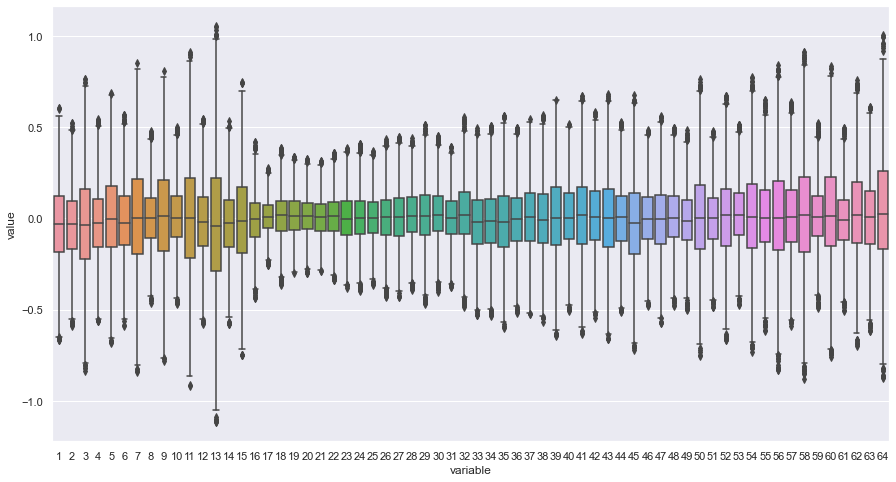

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})

df_last_out_1 = df_last_out[df_last_out.columns[9:73]]
df_last_out_1.columns = range(1, df_last_out_1.shape[1]+1)
df_last_out_1 = pd.melt(df_last_out_1)

df_last_out_2 = df_last_out[df_last_out.columns[73:]]
df_last_out_2.columns = range(1, df_last_out_2.shape[1]+1)
df_last_out_2 = pd.melt(df_last_out_2)

sns.boxplot(x="variable", y="value", data=df_last_out_1)

<AxesSubplot:xlabel='variable', ylabel='value'>

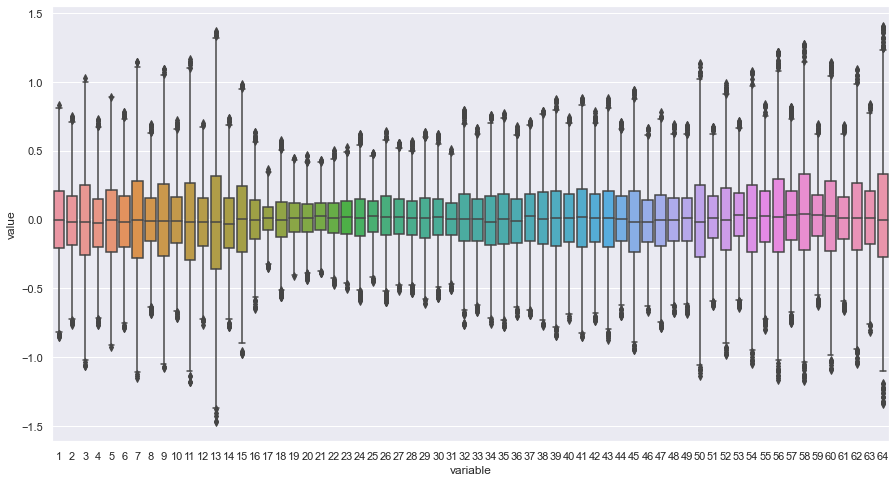

In [ ]:
sns.boxplot(x="variable", y="value", data=df_last_out_2)

## Outlier Removal with LOC and Iterative Imputation

In [ ]:
df_iter = func.iter_imputation(df_last)
df_iter_val = df_iter[df_iter.columns[9:]]
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(df_iter_val)
# select all rows that are not outliers
mask = yhat != -1
df_iter_val= df_iter_val.iloc[mask, :]

Missing: 13718
Missing: 0


In [ ]:
df_iter_loc = pd.concat([df_last[df_last.columns[:9]], df_iter_val], 
                        ignore_index=False, axis=1, verify_integrity=True, join='inner')

In [ ]:
df_iter_loc

,Part_No,Stim_ID,Y/K,Direction,RespTime,Response,G1,G2,Like_OR_Nolike,Goxy1,Goxy2,Goxy3,Goxy4,Goxy5,Goxy6,Goxy7,Goxy8,Goxy9,Goxy10,Goxy11,Goxy12,Goxy13,Goxy14,Goxy15,Goxy16,Ghbr1,Ghbr2,Ghbr3,Ghbr4,Ghbr5,Ghbr6,Ghbr7,Ghbr8,Ghbr9,Ghbr10,Ghbr11,Ghbr12,Ghbr13,Ghbr14,Ghbr15,Ghbr16,Ghbo1,Ghbo2,Ghbo3,Ghbo4,Ghbo5,Ghbo6,Ghbo7,Ghbo8,Ghbo9,Ghbo10,Ghbo11,Ghbo12,Ghbo13,Ghbo14,Ghbo15,Ghbo16,Ghbt1,Ghbt2,Ghbt3,Ghbt4,Ghbt5,Ghbt6,Ghbt7,Ghbt8,Ghbt9,Ghbt10,Ghbt11,Ghbt12,Ghbt13,Ghbt14,Ghbt15,Ghbt16,Koxy1,Koxy2,Koxy3,Koxy4,Koxy5,Koxy6,Koxy7,Koxy8,Koxy9,Koxy10,Koxy11,Koxy12,Koxy13,Koxy14,Koxy15,Koxy16,Khbr1,Khbr2,Khbr3,Khbr4,Khbr5,Khbr6,Khbr7,Khbr8,Khbr9,Khbr10,Khbr11,Khbr12,Khbr13,Khbr14,Khbr15,Khbr16,Khbo1,Khbo2,Khbo3,Khbo4,Khbo5,Khbo6,Khbo7,Khbo8,Khbo9,Khbo10,Khbo11,Khbo12,Khbo13,Khbo14,Khbo15,Khbo16,Khbt1,Khbt2,Khbt3,Khbt4,Khbt5,Khbt6,Khbt7,Khbt8,Khbt9,Khbt10,Khbt11,Khbt12,Khbt13,Khbt14,Khbt15,Khbt16
3,1,1.0,1.0,1.0,1073.0,Left,1,4,0,-0.171196,-0.102954,-0.875261,-0.000342,-0.337183,0.217429,0.020822,0.454714,0.233263,0.839838,-0.104713,0.503555,0.035672,0.926225,0.184096,0.786021,-0.099402,-0.441360,0.420930,-0.323090,0.189353,-0.532296,-0.005857,-0.762548,-0.052403,-0.918665,0.075824,-0.709362,-0.087954,-1.035489,-0.209049,-1.158090,-0.270597,-0.544314,-0.454330,-0.323432,-0.147830,-0.314867,0.014965,-0.307834,0.180860,-0.078826,-0.028890,-0.205807,-0.052281,-0.109264,-0.024954,-0.372069,-0.369999,-0.985674,-0.033400,-0.646521,0.041522,-0.847163,0.009108,-1.070382,0.128457,-0.997491,0.046934,-0.915169,-0.140235,-1.144753,-0.234003,-1.530159,-0.213702,0.101851,-0.864369,-0.020777,-0.392224,0.134953,-0.208951,0.347925,0.067846,0.784468,-0.266378,0.443826,-0.229802,0.850748,0.155352,1.158873,-0.053198,-0.704420,0.395649,-0.437197,0.156076,-0.628296,-0.004996,-0.789858,-0.012509,-0.957821,0.107769,-0.761388,0.004438,-1.095664,-0.260718,-1.962783,-0.266899,-0.602569,-0.468720,-0.457974,-0.236148,-0.493343,-0.213947,-0.441933,0.055337,-0.173353,-0.158609,-0.317562,-0.225364,-0.244915,-0.105366,-0.803910,-0.320097,-1.306990,-0.073071,-0.895170,-0.080073,-1.121639,-0.218943,-1.231791,0.042828,-1.131174,-0.050840,-1.078950,-0.220926,-1.340579,-0.366084,-2.766693
5,1,13.0,1.0,2.0,1032.0,Right,1,6,0,-0.157769,-0.131881,-0.130702,-0.119899,0.183395,0.133742,0.663423,0.371626,0.649885,0.407279,0.481765,0.141346,0.053663,-0.086834,-0.090411,-0.435021,0.154087,-0.116972,0.097887,0.127719,0.004732,-0.079551,-0.238360,-0.067118,-0.121218,-0.010910,-0.137637,-0.069001,-0.002125,0.114249,0.125962,0.807547,-0.003681,-0.248854,-0.032814,0.007820,0.188127,0.054190,0.425062,0.304508,0.528668,0.396369,0.344127,0.072345,0.051538,0.027414,0.035551,0.372527,0.150406,-0.365826,0.065073,0.135538,0.192858,-0.025361,0.186702,0.237391,0.407450,0.385459,0.206490,0.003344,0.049414,0.141663,0.161513,1.180074,-0.170844,-0.019169,-0.502294,-0.204692,0.077855,0.150398,0.530801,0.542533,0.677680,0.492014,0.247811,0.161676,0.159329,0.297853,0.227202,-0.016945,0.246550,0.082843,0.397089,0.303013,0.198308,0.015846,-0.002846,-0.035761,-0.010398,0.071404,0.133901,-0.004075,0.078853,0.017547,0.064540,0.512409,0.075706,0.063673,-0.105206,0.098322,0.276163,0.166243,0.527955,0.506771,0.667283,0.563418,0.381712,0.157601,0.238182,0.315400,0.291742,0.495464,0.322256,0.146516,0.291883,0.401335,0.474471,0.182089,0.525109,0.471010,0.656885,0.634822,0.515613,0.153526,0.317035,0.332946,0.356282,1.007873
6,1,34.0,0.0,1.0,2176.0,Left,1,7,0,0.129763,0.109145,0.140136,0.202626,0.158629,0.226622,0.489568,0.261561,0.467585,0.325109,0.248852,0.281299,0.385314,0.260983,0.439901,0.469657,0.020403,0.079393,-0.011015,-0.033796,0.068611,0.009992,-0.023461,0.111283,0.015690,0.086144,0.012579,0.017652,-0.094509,-0.021606,-0.151732,-0.503184,0.150166,0.188538,0.129121,0.168830,0.227241,0.236615,0.466106,0.372844,0.483275,0.411253,0.261431,0.298951,0.290804,0.239378,0.288169,-0.033526,0.170569,0.267931,0.118106,0.135034,0.295852,0.246607,0.442645,0.484127,0.498965,0.497397,0.274010,0.316602,0.196295,0.217772,0.1364

In [ ]:
#Relocate some columns
# cols = df_iter_loc.columns.tolist()
# cols = cols[0:6] + cols [7:9] + cols[6:7] + cols[9:]
# df_iter_loc = df_iter_loc.copy()[cols]

In [ ]:
# Finally transform boolean expression True, False into 1 0 for imputation and save it as df_iterLOC.csv
df_iter_loc.replace({True: 1, False : 0}, inplace=True)
df_iter_loc.to_csv("C:\\Users\\Lenovo\\Desktop\\ML Neuro\\data\\df_iterLOC.csv", index=False)

In [ ]:
# Finally transform boolean expression True, False into 1 0 for imputation and save it as df_cleaned.csv

df_last_out.replace({True: 1, False : 0}, inplace=True)
df_last_out.to_csv("C:\\Users\\Lenovo\\Desktop\\ML Neuro\\data\\df_cleaned.csv", index=False)